# Supplementary Exercise 1
### Question 1

In [102]:
prime.sieve = function(n) { 
    primes = 2:n # Candidate primes

    for (i in (2:n^0.5)) {
        # This was the only way I could think of to avoid 
        # looking for multiples of numbers that are no longer
        # in the list of candidate primes...
        if (length(primes[primes == i]) > 0) {
            # remove all numbers that are multiples of i (but don't remove i itself!)
            primes <- primes[primes %% i != 0 | primes == i] 
            }
        }
    
    return(primes) 
}

print(prime.sieve(100))

 [1]  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97


## W203 Exercise 1


### Question 2

In [ ]:
n = 100000
xs = runif(n, min = -1, max = 1)
ys = runif(n, min = -1, max = 1)

plot(xs, ys, col=ifelse(xs^2 + ys^2 <= 1, "red", "black"))

df = data.frame(xs, ys, circle=xs^2 + ys^2 <= 1)

# Since True = 1 and False = 0, the average will be the % inside the circle...
print(4*sum(df$circle)/n)


### Variance of estimation of pi

Theoretical solution...
    - variance of single estimate
        var(4*est) = 4^2*var(est) = 16*var(est)
        Since the est is Bernoulli random variable with p = 0.7854 and 1-p = 0.2146,
        var(est) = (0.7854)(0.2146) = 0.1685
        Therefore, the var of a single estimate = 16*0.1685 = 2.7
    - variance of average estimate with n=10000 is 2.7 / 10000 = 0.00027
    
Experimental solution...
        

In [29]:
piest = function(n) {
    xs = runif(n, min = -1, max = 1)
    ys = runif(n, min = -1, max = 1)
    df = data.frame(xs, ys, circle=xs^2 + ys^2 <= 1)

    # Since True = 1 and False = 0, the average will be the % inside the circle...
    est = sum(df$circle)*4/n
    return(est)
    }

count = 1000
manypis = replicate(count, piest(10000))
# print(manypis)
disfrommeansq = (manypis - 3.14159)^2
print(sum(disfrommeansq/(count-1)))

[1] 0.0002769695


In [124]:
x=1:5
y=9:13
z=x+y<12

print(z)

d = data.frame(x1=x,x2=y,x3=z)
print(d)

d[1:2, 'x2']

d[!d$x3, 'x2']

# subset(dataframe, conditions, which columns)
subset(d, !x3, 'x2')

#with (d, ... )

[1]  TRUE FALSE FALSE FALSE FALSE
  x1 x2    x3
1  1  9  TRUE
2  2 10 FALSE
3  3 11 FALSE
4  4 12 FALSE
5  5 13 FALSE


[1]  9 10

[1] 10 11 12 13

x2
2 10
3 11
4 12
5 13

ERROR: Error in setwd("~/Desktop/MIDS 203/Live Sessions/W4"): cannot change working directory


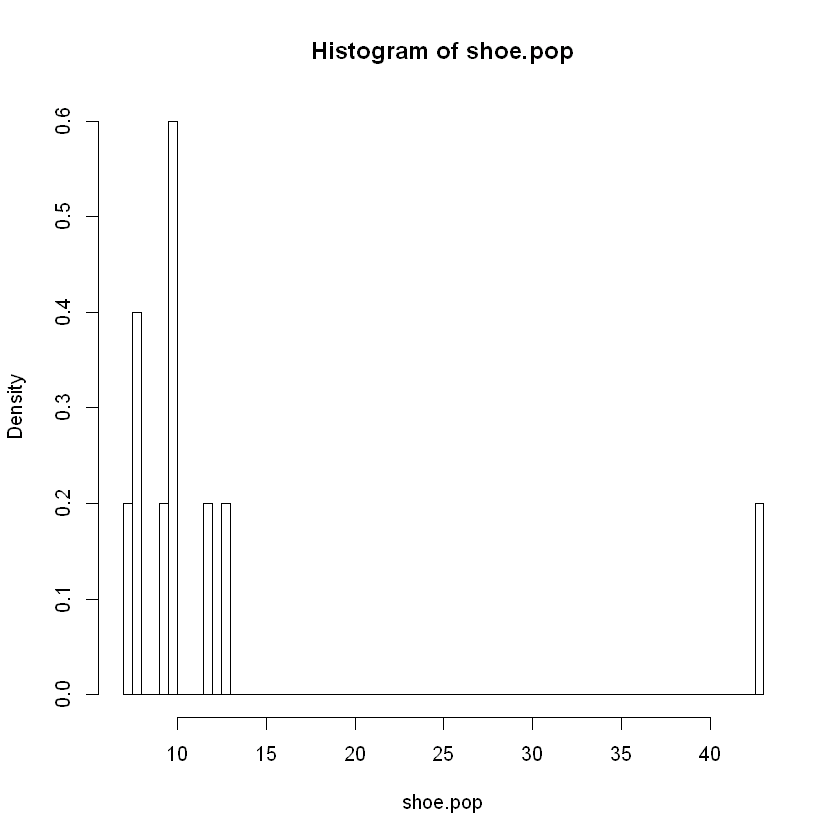

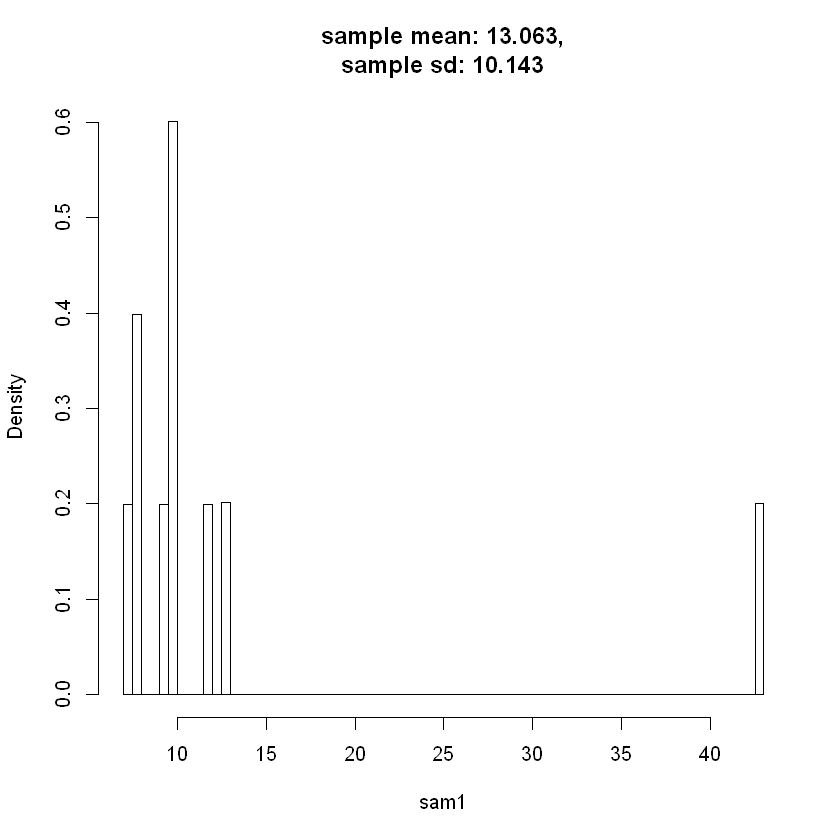

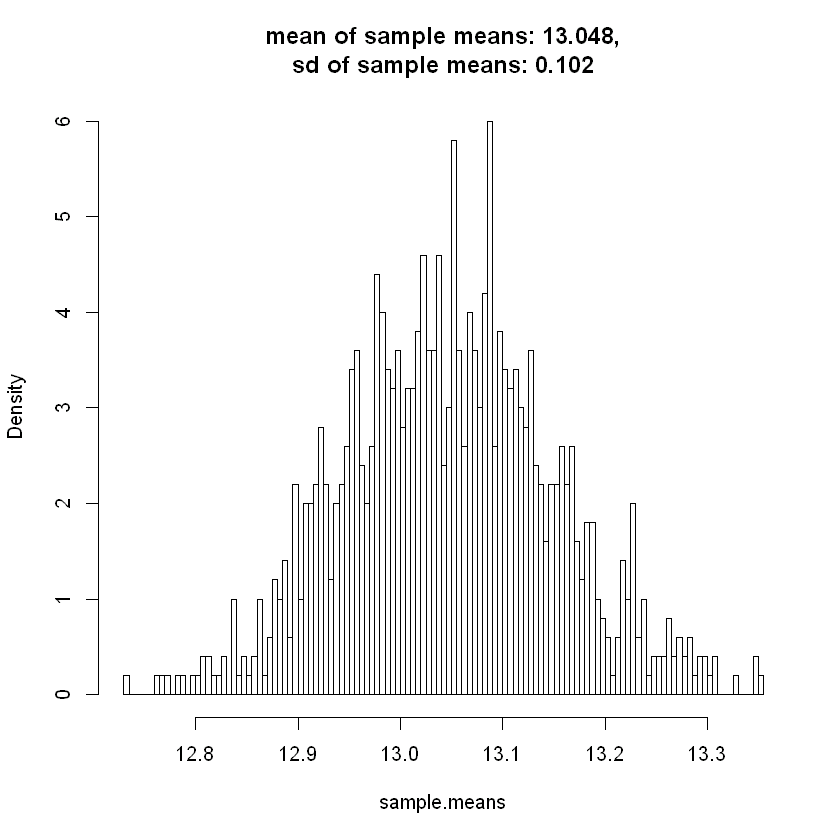

In [35]:
# Code from class example...

# Ali wrote: R code for the demo. I'm pasting the code because this site doesn't let me upload .R files.

setwd('~/Desktop/MIDS 203/Live Sessions/W4')
#getwd()

shoe.pop = c(7,9.5,8,13,12,10,10,8,43, 10)
# population distribution of the variable (Shoe size)
hist(shoe.pop, breaks=100, probability = TRUE)
mean.pop = mean(shoe.pop) # 13.05
sd.pop = sd(shoe.pop) # 10.68


### sample1
samplesize = 1000000
sam1 = sample(shoe.pop,  size = samplesize, replace = TRUE)
mean.sam1 = mean(sam1)
sd.sam1 = sd(sam1)
spr1 = sprintf('sample mean: %2.3f,\nsample sd: %2.3f', mean.sam1, sd.sam1)
hist(sam1, breaks=100, main = spr1, probability = TRUE)

### multiple samples
mysamplemean = function(samplesize = 10){
  sam = sample(shoe.pop, size = samplesize, replace = TRUE)
  mean.sam = mean(sam)
  return(mean.sam)
}

# mysamplemean(100000) passes the sanity test

sample.means = replicate(n=1000, expr=mysamplemean(samplesize = 10000) )
mean.sam.means = mean(sample.means)
sd.sam.means = sd(sample.means)
spr2 = sprintf('mean of sample means: %2.3f,\nsd of sample means: %2.3f', 
               mean.sam.means, sd.sam.means)
hist(sample.means, breaks=100, main = spr2, probability = TRUE)


## Lab #1

Is this actually a dataframe? TRUE 

The mean of the new variable is $ 7,172,376,796 

31  out of the  173  countries have higher than average gdp growth, or  17.91908 %
142  countries have lower than average gdp growth.

 Here's the new dataframe with everything in it...

Country      gdp2010      gdp2011      gdp2012  gdp_growth high_growth
1    Afghanistan  15936784436  18033526069           NA          NA          NA
2        Albania  11858166295  12959563902  13119013351   159449449       FALSE
3        Algeria 162000000000 199000000000 208000000000  9000000000        TRUE
4 American Samoa           NA           NA           NA          NA          NA
5        Andorra           NA           NA           NA          NA          NA
6         Angola  82470894868 104000000000 114000000000 10000000000        TRUE
  code  latitude longitude population2012 abslatitude GDPpercap
1   AF  33.93911 67.709953       30419928    33.93911        NA
2   AL  41.15333 20.168331        3002859    41.15333  4368.841
3   DZ  28.03389  1.659626       35406303    28.03389  5874.660
4 <NA>        NA        NA             NA          NA        NA
5 <NA>        NA        NA             NA          NA        NA
6   AO -11.20269 17.873887       18056072    11.20269  6313.666

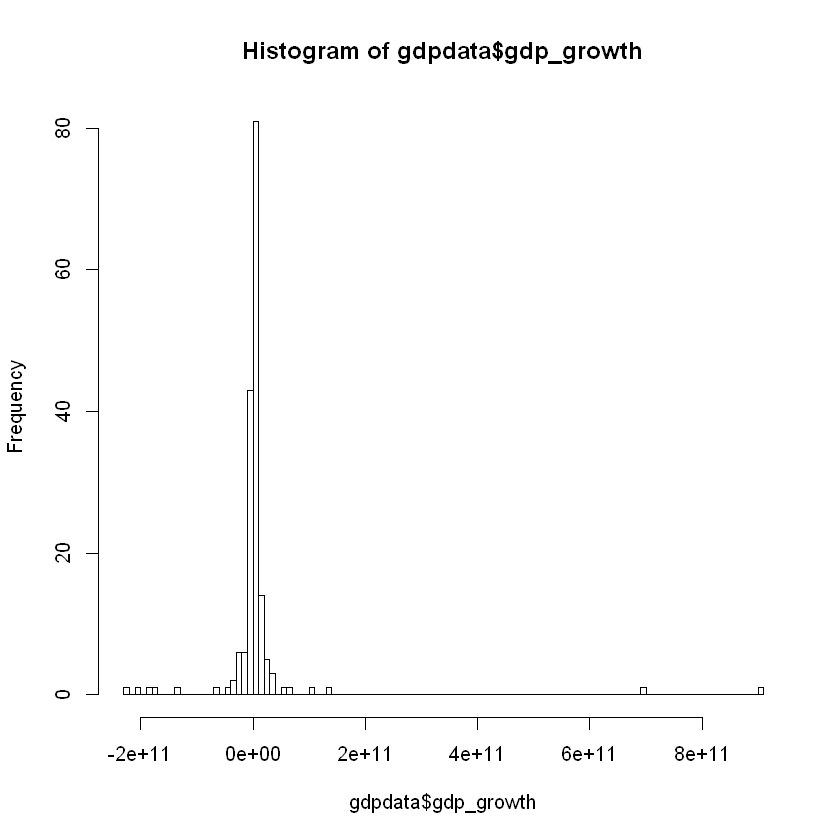


Call:
lm(formula = df$GDPpercap ~ df$abslatitude)

Residuals:
   Min     1Q Median     3Q    Max 
-22691  -9130  -3670   2893  86231 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -816.33    2402.06  -0.340    0.734    
df$abslatitude   537.66      77.19   6.966 7.53e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17410 on 164 degrees of freedom
  (46 observations deleted due to missingness)
Multiple R-squared:  0.2283,	Adjusted R-squared:  0.2236 
F-statistic: 48.52 on 1 and 164 DF,  p-value: 7.526e-11


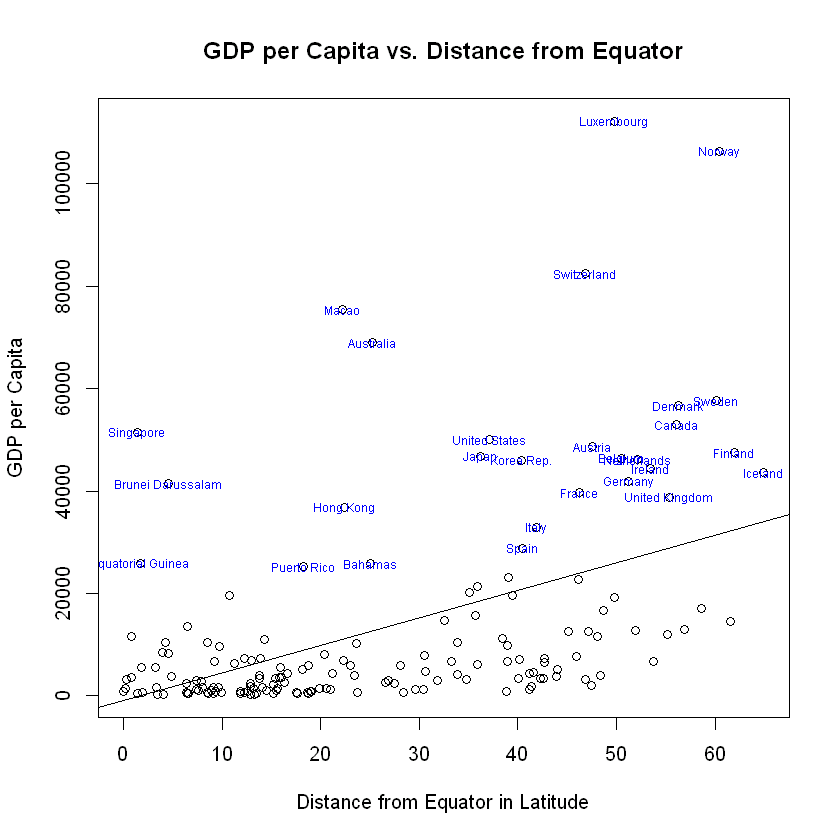

In [167]:
setwd("C:/Users/Jay/MIDSR")
gdpdata = read.csv("GDP_World_Bank.csv", header=TRUE)
cat("Is this actually a dataframe?" , is.data.frame(gdpdata), "\n\n")

# Create new field that is the increase from 2011 to 2012
gdpdata$gdp_growth = gdpdata$gdp2012 - gdpdata$gdp2011

# Print its mean
avggrowth = mean(gdpdata$gdp_growth, na.rm = TRUE)
cat("The mean of the new variable is $", 
    format(avggrowth, big.mark = ","), "\n\n")

# Print the histogram.  Doesn't look normal...to many outliers.
hist(gdpdata$gdp_growth, breaks=100)

# Create new field to flag the countries with higher than avg growth
gdpdata$high_growth = gdpdata$gdp_growth > avggrowth

# summary(gdpdata)
# head(gdpdata)

# Find the count of rows above/below the average
totalrows = sum(!is.na(gdpdata$high_growth))
aboveavg = sum(gdpdata$high_growth, na.rm=TRUE)

cat(aboveavg, " out of the ", totalrows, 
    " countries have higher than average gdp growth, or ", 100 * aboveavg / totalrows, "%\n")
cat(totalrows - aboveavg, " countries have lower than average gdp growth.")

# New dataset about latitude from https://developers.google.com/public-data/docs/canonical/countries_csv
# Also merged in http://www.photius.com/rankings/population/population_2012_1.html

countryloc = read.csv("CountryLoc.csv", header=TRUE)
# head(countryloc)

# join them into a new dataframe...
df = merge(gdpdata, countryloc, all.x = TRUE)

# Find missing countries that have gdp 2012 and fix in Excel
# Note: only imported countries with > 100k population
# df[is.na(df$code) & !is.na(df$gdp2012),]

# I want the absolute value of the latitude to find the distance from the equator
df$abslatitude = abs(df$latitude)

# I want the GDP per capita to even out the playing field
df$GDPpercap = df$gdp2012 / df$population2012

cat("\n\n", "Here's the new dataframe with everything in it...")
head(df)

# Do countries farther away from the equator (cooler places) have higher GDP per capita?
# pdf("plots2.pdf")
options(scipen=5) # Don't like scientific notation on the chart
plot(x=df$abslatitude, y=df$GDPpercap, xlab="Distance from Equator in Latitude",
     ylab="GDP per Capita", main="GDP per Capita vs. Distance from Equator")
text(df$abslatitude[df$GDPpercap > 25000], df$GDPpercap[df$GDPpercap > 25000], 
     df$Country[df$GDPpercap > 25000], cex=0.6, col='blue')

# Let's add a regression line.  It looks like there's a relationship!
reg1 <- lm(df$GDPpercap~df$abslatitude)
abline(reg1)
# dev.off()

summary(reg1) # Let's see the stats!



In [1]:
options(scipen=5) # Don't like scientific notation on the chart
plot(x=df$abslatitude, y=df$GDPpercap, xlab="Distance from Equator in Latitude",
     ylab="GDP per Capita", main="GDP per Capita vs. Distance from Equator")
text(df$abslatitude[df$GDPpercap > 25000], df$GDPpercap[df$GDPpercap > 25000], 
     df$Country[df$GDPpercap > 25000], cex=0.6, col='blue')

# Let's add a regression line.  It looks like there's a relationship!
reg1 <- lm(df$GDPpercap~df$abslatitude)
abline(reg1)

ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


ERROR: Error in df$abslatitude: object of type 'closure' is not subsettable


ERROR: Error in df$GDPpercap: object of type 'closure' is not subsettable


ERROR: Error in abline(reg1): object 'reg1' not found


## Supplementary Exercise #2

False positive rate: 0.0498

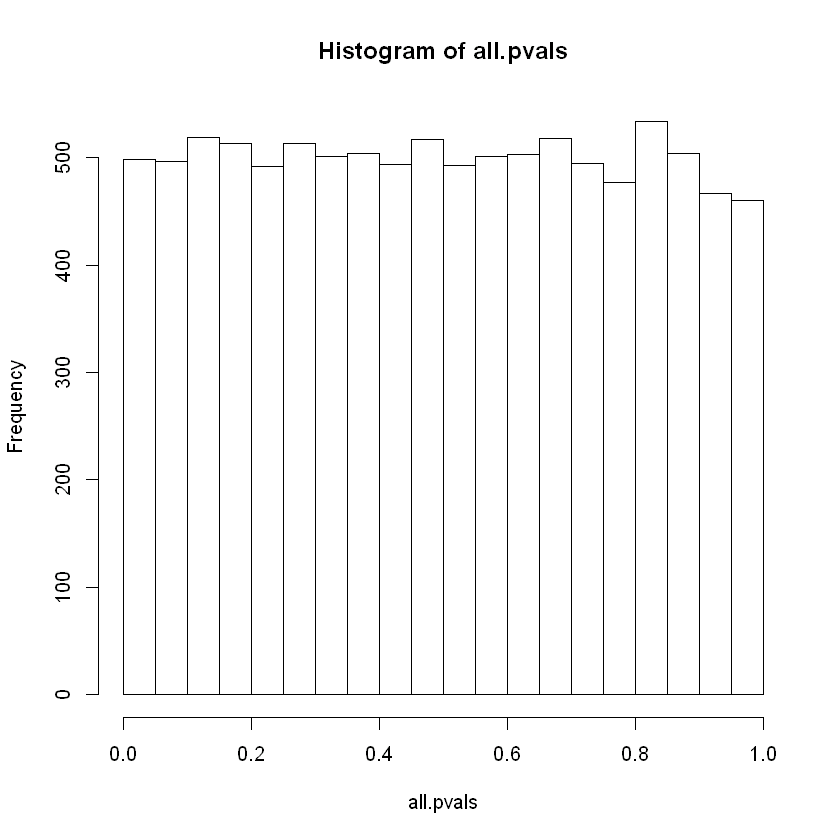

In [314]:
myfun = function(data, mu, pop.sd, two.tailed=TRUE, left.tail=NULL) {
    # Returns the p-value that represents the likelihood the data was
    # created from a population with the given mean and standard deviation

    n = length(data)
    zscore = (mean(data) - mu) / (pop.sd / n^0.5)    
    
    if (two.tailed) {
        pvalue = pnorm(0-abs(zscore)) * 2
        }
    else
        {if (left.tail) {pvalue = pnorm(zscore)
                        }
            else
                {pvalue = pnorm(zscore, lower.tail=FALSE)
                }
        }
    
    if (pvalue < 0.05) {rN=TRUE}
    else
        {rN=FALSE}
    
    return(list(p.value=pvalue, rejectNull=rN))
}

myrepfalseposfun = function(n, mean, stdev){ 
    # Run n simulations to find rate of false positives
    asample = rnorm(n, mean, stdev)
    pval  = myfun(asample, mean, stdev)$p.value
    return(pval)
  }

threshold = 0.05
reps = 10000

all.pvals = replicate (reps, myrepfalseposfun(10000, 100, 15) )
hist(all.pvals)

percent.rejected = sum(all.pvals < threshold)  / reps

cat("False positive rate:", percent.rejected) # should approach 0.05 as n approaches infinity


Percent falsely accepted: 0.739 
Statistical power:  0.261

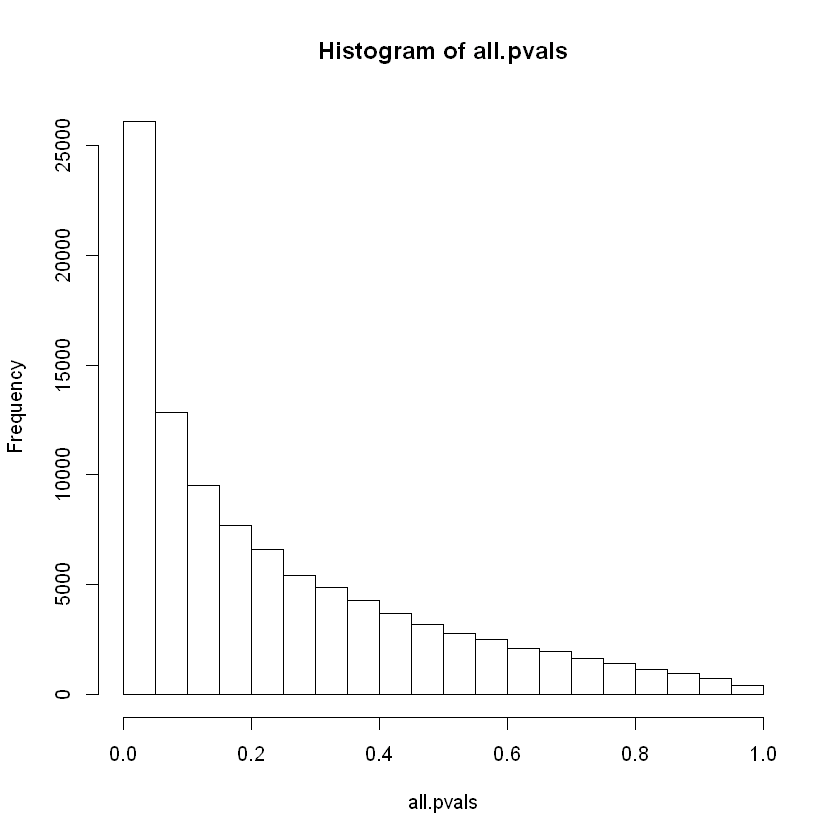

In [317]:
myrepfalsenegfun = function(n, mean, stdev){ 
    # Run n simulations to find rate of false positives
    asample = rnorm(n, mean + stdev*0.1, stdev)
    pval  = myfun(asample, mean, stdev, FALSE, FALSE)$p.value
    return(pval)
  }

threshold = 0.05
reps = 100000

all.pvals = replicate(reps, myrepfalsenegfun(100, 100, 15))
hist(all.pvals)

percent.rejected = sum(all.pvals < threshold) / reps

cat("Percent falsely accepted:", 1 - percent.rejected, "\n") 
cat("Statistical power: ", 1 - (1-percent.rejected))

# Theoretical Type II probability...
# H0 = 100
# H1 = 101.5
# Sig = 15
# n = 100

# crit - H0 / (Sig / n^0.5) = -1.645


In [186]:
# Scratch pad
asample = rnorm(100, 0, 1)
print(mean(asample))

print(myfun(asample, 0, 1))


[1] 0.1283899
[1] 1.283899
$p.value
[1] 0.9004113

$rejectNull
[1] FALSE



## Lab 2

[1] "Header of the data..."


id          wrkstat       marital agewed sibs childs age  birthmo   zodiac
1  1 Working fulltime      divorced     20    3      1  43      May   Taurus
2  2 Working fulltime never married      0    2      0  44   August    Virgo
3  3 Working fulltime      divorced     25    2      0  43 February Aquarius
4  4 Working parttime never married      0    4      0  45       NA       NA
5  5          Retired never married      0    1      0  78  October    Libra
6  6          Retired       married     25    2      2  83    March   Pisces
  educ      degree    sex  race     income91          region        xnorcsiz
1   11 High school   Male white $40000-49999 Middle Atlantic City, GT 250000
2   16    Bachelor   Male black $40000-49999 Middle Atlantic City, GT 250000
3   16    Bachelor Female white $40000-49999 Middle Atlantic City, GT 250000
4   15 High school Female white      Refused Middle Atlantic City, GT 250000
5   17    Graduate Female white      $75000+ Middle Atlantic City, GT 250000
6   11 High school   Male white $20000-22499 Middle Atlantic City, GT 250000
  vote92 cappun gunlaw     grass      relig     life         pillok sexeduc
1  voted Oppose Oppose Not Legal      Other  Routine            NAP     NAP
2  voted Oppose  Favor       NAP       None Exciting       Disagree   Favor
3  voted  Favor  Favor Not Legal   Catholic Exciting            NAP     NAP
4  voted  Favor    NAP        DK Protestant      NAP          Agree   Favor
5  voted Oppose  Favor       NAP Protestant Exciting Strongly Agree   Favor
6  voted  Favor  Favor Not Legal     Jewish  Routine            NAP     NAP
        spanking letdie1     news tvhours          bigband          blugrass
1            NAP     NAP      NAP       4       Dislike It        Dislike It
2 Strongly Agree     Yes Everyday       5          Like It    Mixed Feelings
3            NAP     NAP      NAP       2          Like It    Mixed Feelings
4       Disagree      No Everyday       4 DK Much About It Dislike Very Much
5          Agree      No Everyday       1          Like It    Mixed Feelings
6            NAP     NAP      NAP       4   Like Very Much    Mixed Feelings
         country          blues       musicals          classicl
1 Mixed Feelings        Like It        Like It Like It Very Much
2 Mixed Feelings Like Very Much        Like It Like It Very Much
3 Mixed Feelings Mixed Feelings Like Very Much Like It Very Much
4 Mixed Feelings Mixed Feelings Mixed Feelings Like It Very Much
5     Dislike It Like Very Much        Like It Like It Very Much
6 Mixed Feelings Like Very Much        Like It  DK Much About It
               folk              jazz             opera               rap
1    Mixed Feelings           Like It           Like It Dislike Very Much
2           Like It Like It Very Much    Like Very Much        Dislike It
3           Like It    Mixed Feelings    Like Very Much        Dislike It
4 Dislike Very Much           Like It Dislike Very Much Dislike Very Much
5    Like Very Much Like It Very Much    Like Very Much  DK Much About It
6    Mixed Feelings Like It Very Much Dislike Very Much    Mixed Feelings
           hvymetal attsprts visitart      scitest4   partners      sexfreq
1 Dislike Very Much       No      Yes            NA  1 Partner Once a Month
2 Dislike Very Much       No      Yes Probably True 2 Partners Once a Month
3        Dislike It       No      Yes Probably True  1 Partner 2-3 Per Week
4 Dislike Very Much       No      Yes            DK        NAP          NAP
5  DK Much About It      Yes      Yes            NA         NA           NA
6 Dislike Very Much       No       No Probably True  1 Partner Once a Month
    dwelown cohort     politics
1       nap   1950    Tend Cons
2 pays rent   1949      Liberal
3       nap   1950 Conservative
4 pays rent   1948     Moderate
5 pays rent   1915     Tend Lib
6       nap   1910      Liberal

[1] "Group by agewed to see if it makes sense..."


agewed  id
1       0 286
2      13   1
3      14   4
4      15   7
5      16  32
6      17  43
7      18 118
8      19 129
9      20 121
10     21 132
11     22  96
12     23  82
13     24  82
14     25  72
15     26  61
16     27  49
17     28  27
18     29  34
19     30  25
20     31  18
21     32  21
22     33  10
23     34   5
24     35   7
25     36   6
26     37   3
27     38   4
28     40   3
29     41   1
30     42   2
31     43   1
32     45   1
33     47   1
34     49   1
35     50   1
36     54   1
37     58   1
38     99  12

[1] "Summary of the data..."


       id                     wrkstat             marital        agewed     
 Min.   :   1.0   Working fulltime:747   married      :795   Min.   : 0.00  
 1st Qu.: 396.8   Retired         :231   widowed      :165   1st Qu.:18.00  
 Median : 803.5   Keeping house   :200   divorced     :213   Median :21.00  
 Mean   : 801.1   Working parttime:161   separated    : 40   Mean   :19.06  
 3rd Qu.:1199.2   Unempl, laid off: 51   never married:286   3rd Qu.:24.00  
 Max.   :1606.0   School          : 42   NA           :  1   Max.   :99.00  
                  (Other)         : 68                                      
      sibs           childs           age           birthmo   
 Min.   : 0.00   Min.   :0.000   Min.   :18.0   March   :154  
 1st Qu.: 2.00   1st Qu.:0.000   1st Qu.:33.0   July    :144  
 Median : 3.00   Median :2.000   Median :43.0   August  :137  
 Mean   : 4.03   Mean   :1.875   Mean   :46.4   January :133  
 3rd Qu.: 5.00   3rd Qu.:3.000   3rd Qu.:59.0   June    :131  
 Max. 

Original number of rows:  1500 
Original number of NAs in 'agewed':  0 
Number of 'agewed' with zero:  286 
Number of 'agewed' of 99:  12 
New number of NAs in 'agewed':  298 
Number of non-null rows:  1202 
Mean of agewed:  22.79201 


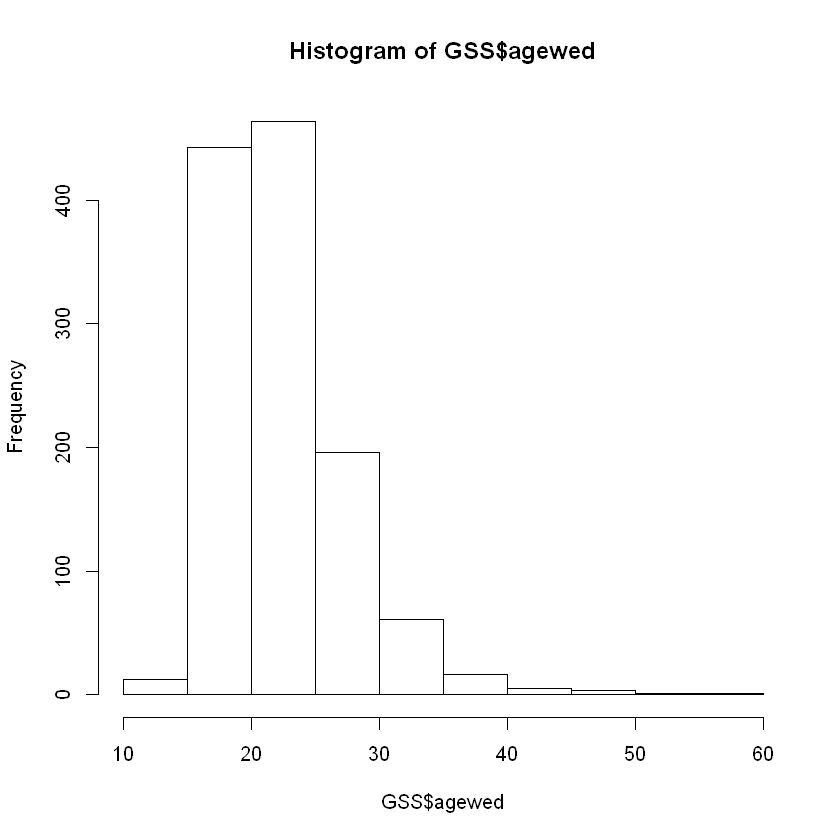


	Shapiro-Wilk normality test

data:  GSS$agewed
W = 0.8896, p-value < 2.2e-16



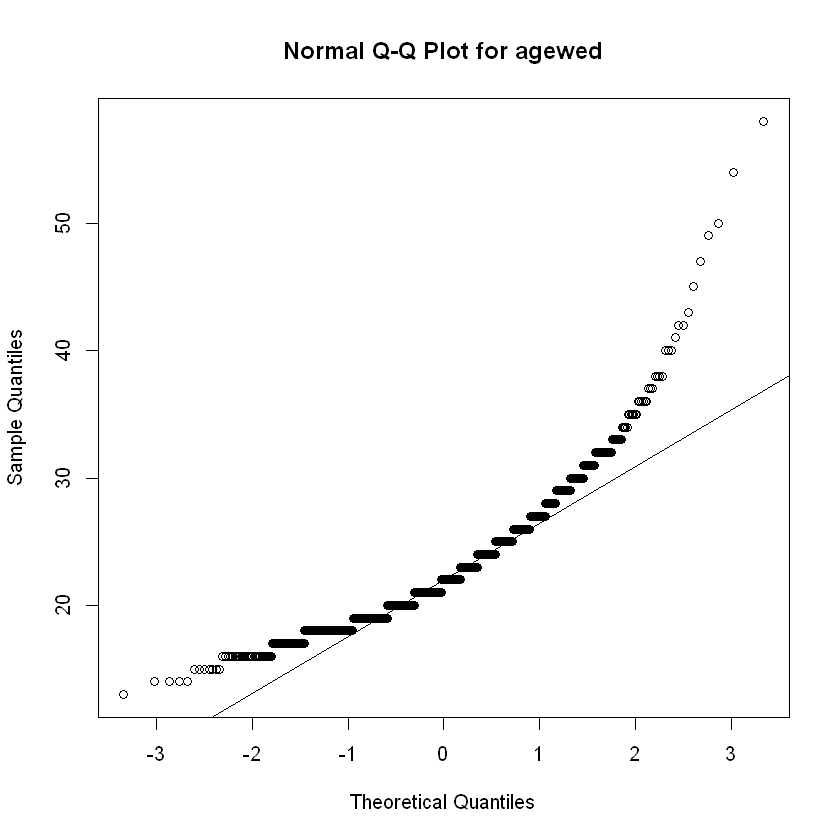

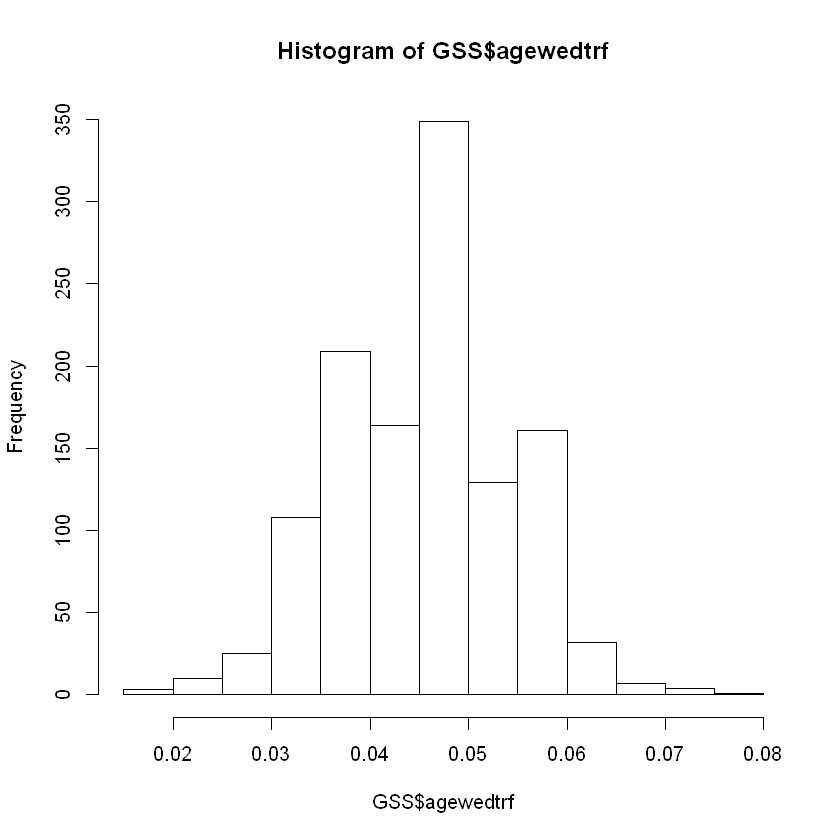


	Shapiro-Wilk normality test

data:  GSS$agewedtrf
W = 0.9912, p-value = 1.27e-06

Mean of agewed:  22.79201 
Variance for Males:  23.6843 
Variance for Females:  24.29948 
[1] "Count of records by sex"


sex  id
1   Male 641
2 Female 859

[1] "Count of non-null agewed records by sex"


sex agewed
1   Male    492
2 Female    710

Levene's Test for Homogeneity of Variance (center = median)
        Df F value Pr(>F)
group    1  0.9609 0.3272
      1200               
[1] 22.79201
[1] 1202
Z-Score (assuming mean is 23):  -1.442174 
probability Z at least that extreme: 0.1492532[1] 0.04569543
[1] 1202
Z-Score (assuming mean is 1/23):  0.3843451 
probability Z at least that extreme: 0.7007227

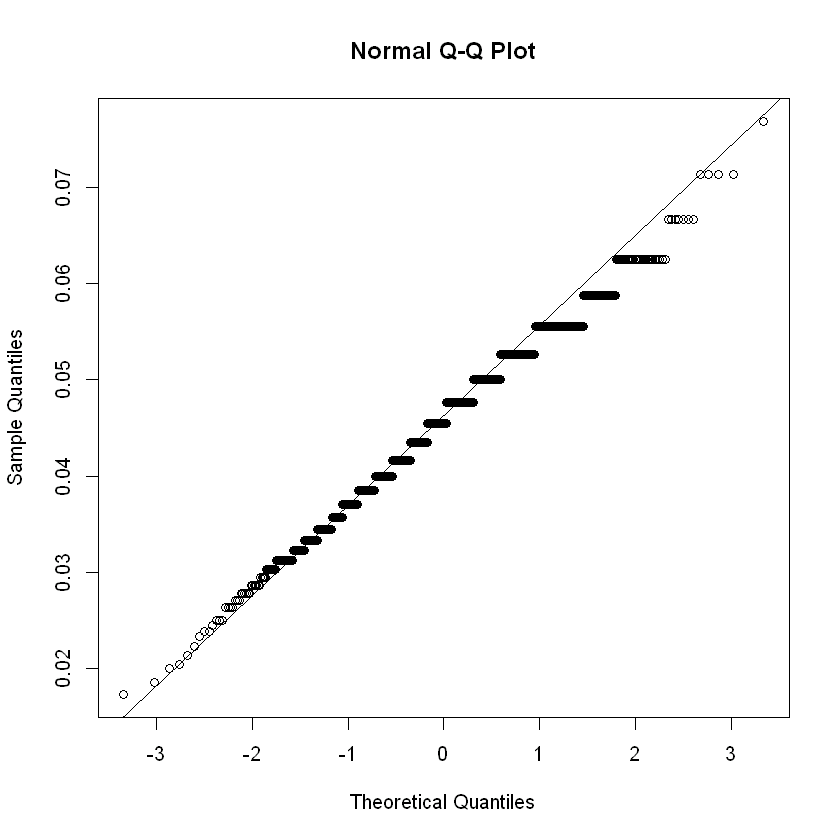

In [14]:
setwd("C:/Users/Jay/MIDSR")
load("GSS.Rdata")
print("Header of the data...", noquote=TRUE)
head(GSS)
print("Group by agewed to see if it makes sense...", noquote=TRUE)
aggregate(id ~ agewed, data = GSS, FUN = length)
print("Summary of the data...", noquote=TRUE)
summary(GSS)

cat("Original number of rows: ", length(GSS$agewed), "\n")
cat("Original number of NAs in 'agewed': ", length(GSS$agewed[is.na(GSS$agewed)]), "\n")
cat("Number of 'agewed' with zero: ", length(GSS$agewed[GSS$agewed==0]), "\n")
cat("Number of 'agewed' of 99: ", length(GSS$agewed[GSS$agewed==99]), "\n")

GSS$agewed[GSS$agewed==0] = NA
GSS$agewed[GSS$agewed==99] = NA

cat("New number of NAs in 'agewed': ", length(GSS$age[is.na(GSS$agewed)]), "\n")
cat("Number of non-null rows: ", length(GSS$agewed[!is.na(GSS$agewed)]), "\n")
cat("Mean of agewed: ", mean(GSS$agewed, na.rm=TRUE), "\n")

hist(GSS$agewed)

qqnorm(GSS$agewed, main="Normal Q-Q Plot for agewed" )
qqline(GSS$agewed)
print(shapiro.test(GSS$agewed))


GSS$agewedtrf = 1/(GSS$agewed)
hist(GSS$agewedtrf)
qqnorm(GSS$agewedtrf)
qqline(GSS$agewedtrf)
print(shapiro.test(GSS$agewedtrf))

cat("Mean of agewed: ", mean(GSS$agewed, na.rm=TRUE), "\n")
cat("Variance for Males: ", var(GSS$agewed[GSS$sex=='Male'], na.rm=TRUE), "\n")
cat("Variance for Females: ", var(GSS$agewed[GSS$sex=='Female'], na.rm=TRUE), "\n")

print("Count of records by sex")
aggregate(id ~ sex, data = GSS, FUN = length)


print("Count of non-null agewed records by sex")
aggregate(agewed ~ sex, data = GSS, FUN = length)

library(car)
print(leveneTest(agewed~sex,GSS))

# Info needed for Z-test
mean0 = 23
meanA = mean(GSS$agewed, na.rm=TRUE)
sd0 = 5
n = length(GSS$agewed[!is.na(GSS$agewed)])

zscore = (meanA - mean0) / (sd0 / n^0.5)

print(meanA)
print(n)
cat("Z-Score (assuming mean is 23): ", zscore, "\n")
cat("probability Z at least that extreme:", pnorm(zscore)*2)


# Z-test on transformed variable
mean0 = 1/23
meanA = mean(GSS$agewedtrf, na.rm=TRUE)
sd0 = 1/5
n = length(GSS$agewedtrf[!is.na(GSS$agewedtrf)])

zscore = (meanA - mean0) / (sd0 / n^0.5)

print(meanA)
print(n)
cat("Z-Score (assuming mean is 1/23): ", zscore, "\n")
cat("probability Z at least that extreme:", (1-pnorm(zscore))*2)



war       insurg incumb     occ  wdl
16 Vietnam War Vietcong/NVA    USA foreign lose

          
           lose draw win
  domestic   35   46  93
  foreign    43    9  60

[1] "statistic" "parameter" "p.value"   "method"    "data.name" "observed" 
[7] "expected"  "residuals" "stdres"


	Pearson's Chi-squared test

data:  insurgency$occ and insurgency$wdl
X-squared = 20.3446, df = 2, p-value = 3.821e-05


              insurgency$wdl
insurgency$occ         lose         draw          win
      domestic -1.807960647  2.167560857 -0.008697769
      foreign   2.253484555 -2.701698692  0.010841104

insurgency$wdl
insurgency$occ     lose     draw      win
      domestic 47.45455 33.46154 93.08392
      foreign  30.54545 21.53846 59.91608

              insurgency$wdl
insurgency$occ lose draw win
      domestic   35   46  93
      foreign    43    9  60


	Pearson's product-moment correlation

data:  insurgency$pol2 and insurgency$dur
t = -0.942, df = 284, p-value = 0.347
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.17068852  0.06056555
sample estimates:
        cor 
-0.05580994 



	Kendall's rank correlation tau

data:  insurgency$pol2 and insurgency$dur
z = 0.1023, p-value = 0.9185
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
0.004196086 



	Kendall's rank correlation tau

data:  insurgency$pol2 and log(insurgency$dur)
z = 0.1023, p-value = 0.9185
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
0.004196086 


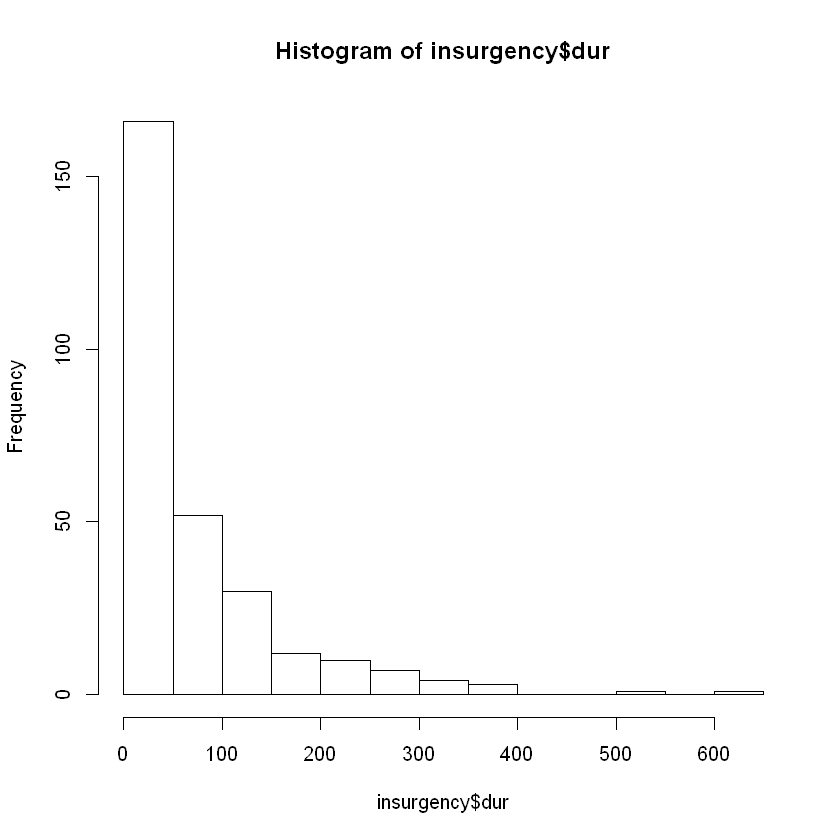

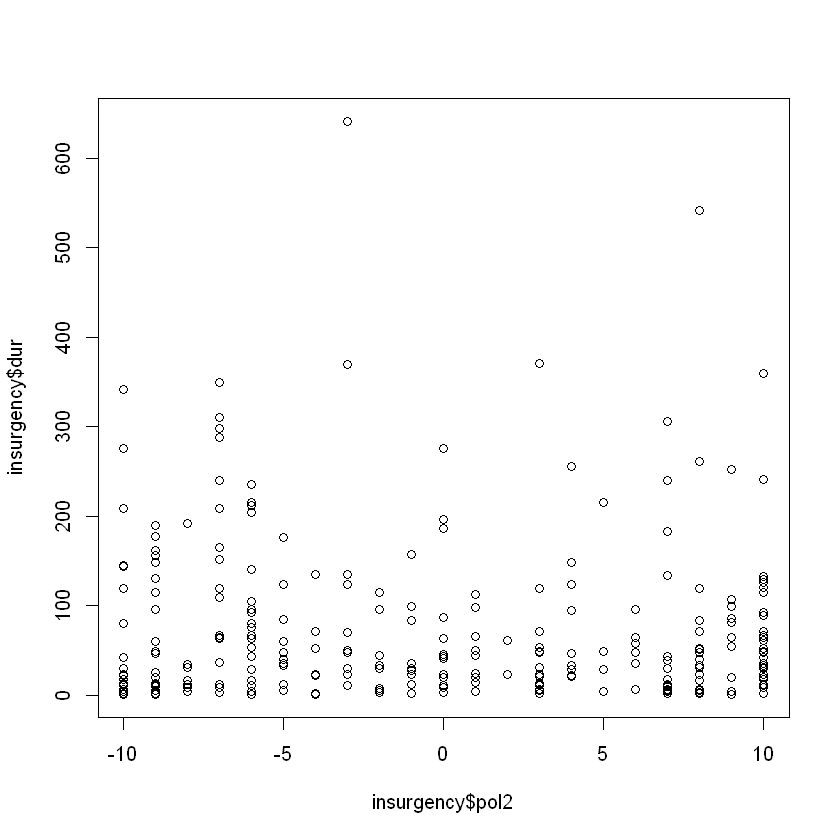

In [68]:
# install.packages(c("gmodels"))
# library(gmodels)
library(foreign)

insurgency = read.dta("lyall2010.dta")
# summary(insurgency)

# occ vs. wdl (foreign land(1) vs. domestic(0) and win(2)/draw(1)/lose(0))
# pol2 vs. dur (pol2 of 10 means full democratic, -10, not so much) vs. months in duration

# variable types...
# dur = ratio variable
# wdl = ordinal (categorical)
# pol2 = ordinal
# occ = binary (categorical)

insurgency$occ = factor(insurgency$occ, labels=c('domestic', 'foreign'))
insurgency$wdl = factor(insurgency$wdl, labels=c('lose', 'draw', 'win'))

# head(insurgency, n = 100)
insurgency[16, c('war', 'insurg', 'incumb', 'occ', 'wdl')]

# occ vs. wdl (foreign land(1) vs. domestic(0) and win(2)/draw(1)/lose(0))
chisq = chisq.test(insurgency$occ, insurgency$wdl) # null = no relationship
table(insurgency$occ, insurgency$wdl)
names(chisq)
chisq
chisq$residuals
chisq$expected
chisq$observed

# cor.test(insurgency$occ, insurgency$wdl, method="kendall") 


# pol2 vs. dur (pol2 of 10 means full democratic, -10, not so much) vs. months in duration
cor.test(insurgency$pol2, insurgency$dur) # null is not correlated - Pearson if using interval data, which it's not

# Want non-parametric test, Kendel's Tau (correlation on rank)
cor.test(insurgency$pol2, insurgency$dur, method="kendall") 
cor.test(insurgency$pol2, log(insurgency$dur), method="kendall") # log doesn't change ranks, so doesn't make sense!

# non-parametric tests need larger samples to get the same power.  Harder to get significance
# however, assumptions about distribution don't matter

hist(insurgency$dur) # a lot of positive skew.  Okay, since it's non-parametric test
# parametric test would need log or something to get rid of skew

plot(insurgency$pol2, insurgency$dur)

# what we mean by correlation is there's a linear relationship.  There could be a relationship,
# but if it's not linear, Pearson will lead us astray.  Always look at the scatter plot.

# Consider that a correlation is a measure of effect size ... standardization to a scale of 0 being a 
# small effect, and 0 being no correlation.  1 or -1 being totally correlated



In [12]:
setwd("C:/Users/Jay/MIDSR")
df = read.csv("united_states_senate_2014.csv", header=TRUE)
summary(df)

# Campaign.Money.Raised..millions.of... vs. Campaign.Money.Spent..millions.of...

# Gender = Female Republican vs. Female Democrat

# Religion = "Protestant" vs. everyone else

names(df)
# senate[,1]
names(df)[6]
names(df)[7]


               Senator.Names    Gender          State            Party   
 Alan âAlâ Franken: 1    Female:20   Alabama   : 2   Democrat   :53  
 Amy Klobuchar        : 1    Male  :80   Alaska    : 2   Independent: 2  
 Angus King           : 1                Arizona   : 2   Republican :45  
 Barbara Boxer        : 1                Arkansas  : 2                   
 Barbara Mikulski     : 1                California: 2                   
 Benjamin Cardin      : 1                Colorado  : 2                   
 (Other)              :94                (Other)   :88                   
            Religion  Campaign.Money.Raised..millions.of...
 Protestant     :49   Min.   : 0.100                       
 Catholic       :27   1st Qu.: 4.575                       
 Jewish         :10   Median : 7.550                       
 Other Christian: 7   Mean   : 9.645                       
 Mormon         : 2   3rd Qu.:13.800                       
 Unaffiliated   : 2   Max.   :44.200            

[1] "Senator.Names"                        
[2] "Gender"                               
[3] "State"                                
[4] "Party"                                
[5] "Religion"                             
[6] "Campaign.Money.Raised..millions.of..."
[7] "Campaign.Money.Spent..millions.of..."

[1] "Campaign.Money.Raised..millions.of..."

[1] "Campaign.Money.Spent..millions.of..."

In [13]:
colnames(df)[6] = "Money_Raised"
colnames(df)[7] = "Money_Spent"
t.test(df$Money_Raised,df$Money_Spent,paired = T)


df.female = df[df$Gender == "Female",]
wilcox.test(df.female$Money_Raised ~ df.female$Party)

Question 1
US = united_states_senate_2014
t.test(US$Raised, US$Spent, paired = T)

# Ho: no difference
# Ha: difference
t.test(US$Raised, US$Spent, paired = T)

#cohens_d(senate$Spent, senate$Raised) for effect size?

	Paired t-test

data:  senate_data$Raised and senate_data$Spend
t = 5.9944, df = 99, p-value = 3.329e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.9486232 1.8873768
sample estimates:
mean of the differences 
                  1.418 

Question 2
USfemale = US[US$Gender == "Female",]
# Ho: mean of money raised by female democratic the same as mean of female republican
# Ha: mean female democratic is more or less than fem rep (not equal)

	Shapiro-Wilk normality test

data:  female_senate$Raised
W = 0.75051, p-value = 0.0001725
Qqplot not straight line so normality assumption not met

wilcox.test(USfemale$Raised ~ USfemale$Party)

Wilcoxon rank sum test with continuity correction

data:  USfemale$Raised by USfemale$Party
W = 58, p-value = 0.01593
alternative hypothesis: true location shift is not equal to 0

p-value < 0.05 thus reject Ho, i.e. not equal

# fem_senators <- senate[senate$Gender == 'Female', ]
# wilcox.test(fem_senator$raised ~ fem_senator$party)
# cohens_d (female_dem, female_rep)  for effect size


Question 3
US$protestant = US$Religion == "Protestant"
t.test(US$Spent ~ US$protestant, US)

# senate$isProtestant <- senate$Religion == 'Protestant'
# sum(senate$isProtestant)
# factor(senate$isProtestant)

# t.test(senate$spent ~ senate$isProtestant)
# protestant = senate$raised[senate$IsProtestant]
# non_protestant = ...
# cohens_d(protestant, non_protestant)

	Welch Two Sample t-test

data:  US$Spent by US$protestant
t = 1.2856, df = 97.177, p-value = 0.2016
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.038329  4.857697
sample estimates:
mean in group FALSE  mean in group TRUE 
           9.162745            7.253061 

p-value > 0.05 so not reject Ho (ie same mean of $ spent)



ERROR: Error in parse(text = x, srcfile = src): <text>:9:10: unexpected numeric constant
8: 
9: Question 1
            ^


In [14]:
# means are far apart but not significantly different...
x1 = rnorm(100, mean=1000, sd=500)
x2 = rnorm(100, mean=1500, sd=3000)
t.test(x1, x2)



	Welch Two Sample t-test

data:  x1 and x2
t = -1.6229, df = 103.986, p-value = 0.1076
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1101.458   109.995
sample estimates:
mean of x mean of y 
 1022.152  1517.883 


# Supplementary Exercise 3

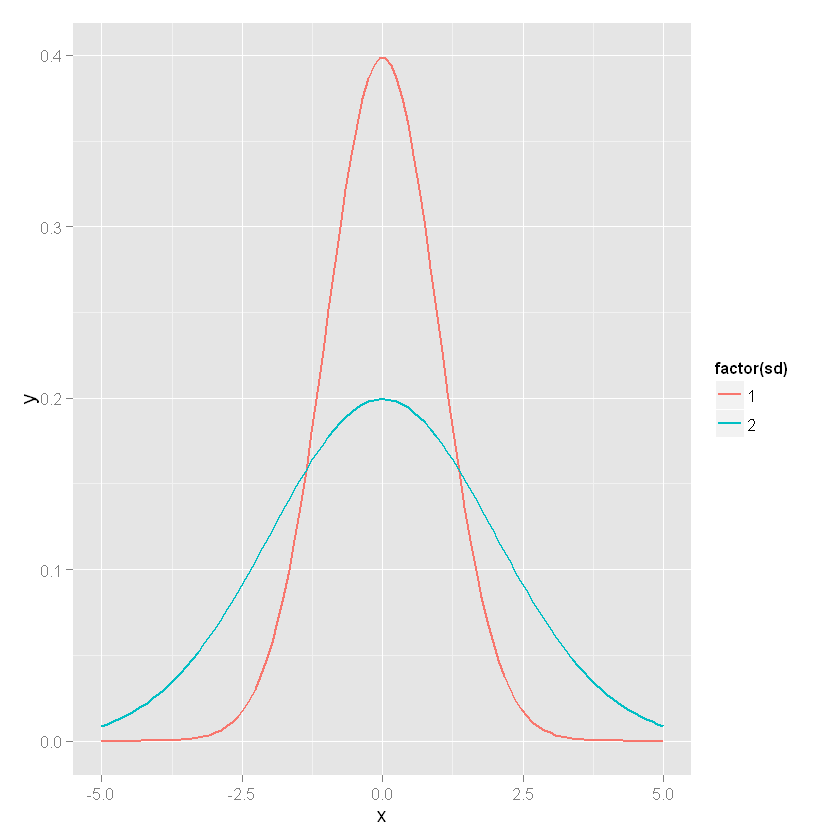

In [15]:
# Sample
library(ggplot2)

# we need a base (for our horizontal axis)
x = seq(-5, 5 , length.out = 100)
y1 = dnorm(x , sd = 1)
y2 = dnorm(x , sd = 2)

Dtemp = data.frame(x = c(x,x), y = c(y1,y2) , sd = rep(c(1,2) , each=100) )
ggplot(Dtemp, aes(x,y, col = factor(sd))) + geom_line(size=.75)


[1] Magic data set. I don't really understand how this worked.


x            y curve_type
1 -5.000000 1.486720e-06   std norm
2 -4.898990 2.451061e-06   std norm
3 -4.797980 3.999890e-06   std norm
4 -4.696970 6.461166e-06   std norm
5 -4.595960 1.033101e-05   std norm
6 -4.494949 1.635096e-05   std norm



Here are the alphas for the various curves at 1.96...
std norm alpha: 0.04999579 
t-dist(10) alpha: 0.07843624 
t-dist(25) alpha: 0.06123257 
t-dist(100) alpha: 0.0527789 


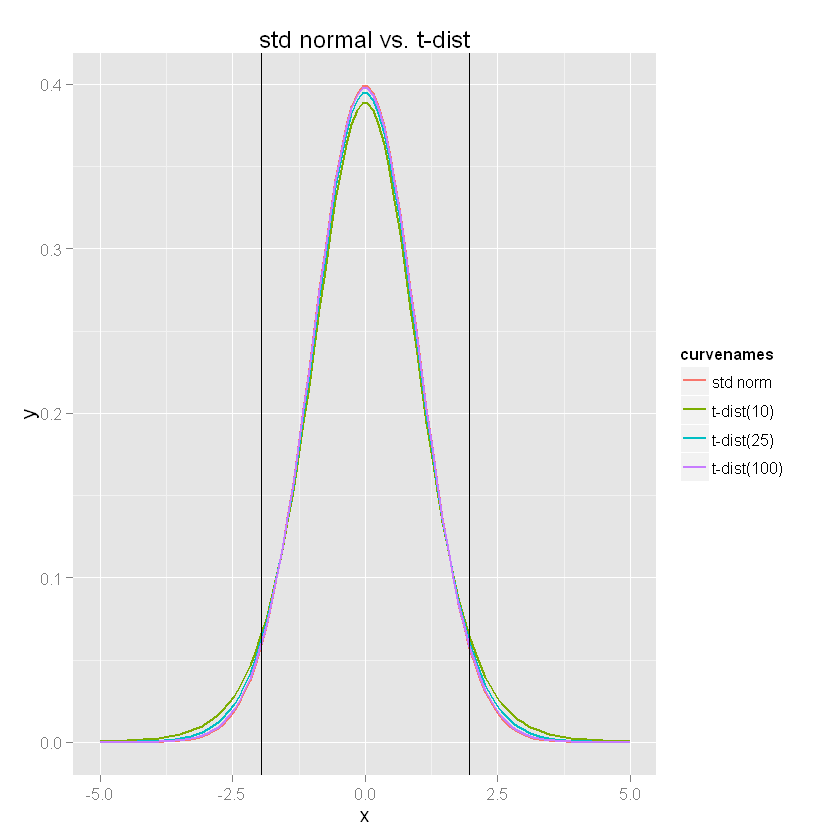

In [56]:
library(ggplot2)

# we need a base (for our horizontal axis) - this is a hundred values between -5 and 5
base = seq(-5, 5 , length.out = 100)

# create the distribution for the standard normal and the three t-distributions
stdnorm = dnorm(base)
t10 = dt(x, df=10)
t25 = dt(x, df=25)
t100 = dt(x, df=100)

# create the data frame with the data to be charted
dists = data.frame(x = c(base,base,base,base), y = c(stdnorm,t10,t25,t100), 
                   curve_type = rep(c('std norm', 't-dist(10)', 't-dist(25)', 't-dist(100)'), each=100))

# this has four sets of those base values and magically calculates the y-values based on it
# for each of the distributions ... 
print("Magic data set. I don't really understand how this worked.", quote=FALSE)
head(dists)

# set the curve names to a factor to be used for colors ('levels' explicitly sets the order)
curvenames=factor(dists$curve_type, levels=c('std norm', 't-dist(10)', 't-dist(25)', 't-dist(100)'))

ggplot(dists, aes(x,y, col=curvenames), size=2) + 
    geom_line(size=.75) + 
    ggtitle("std normal vs. t-dist") + 
    geom_vline(xintercept = 1.96) + 
    geom_vline(xintercept = -1.96)

# so what are the real alpha levels at 1.96 and -1.96 
# for two-tailed tests for the three t-distributions?

cat("\n")
cat("\n")
cat("Here are the alphas for the various curves at 1.96...\n")
cat("std norm alpha:", pnorm(-1.96) * 2, "\n")
cat("t-dist(10) alpha:", pt(-1.96, df=10) * 2, "\n")
cat("t-dist(25) alpha:", pt(-1.96, df=25) * 2, "\n")
cat("t-dist(100) alpha:", pt(-1.96, df=100) * 2, "\n")



## Supplementary Exercise 4

Median of original sample:  94.34379 
Bootstrap Median: 94.34379 
Conf Int: 87.84068 to 112.8079

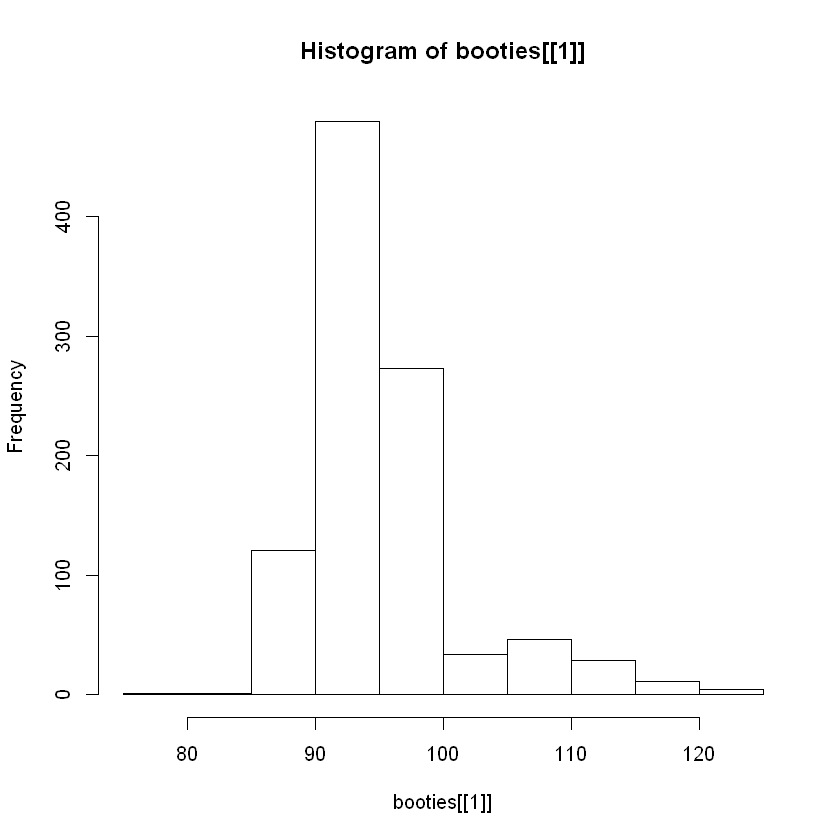

In [101]:
bootmedians = function(data, NBS) {
    bootstraps = lapply(1:NBS, function(i) sample(data, replace=T))
    medians = sort(sapply(bootstraps, median))
    lowend = round(NBS * 0.025)
    highend = round(NBS * 0.975)
    confint = list(medians[lowend],medians[highend])
    # print(medians[lowend])
    # print(medians[highend])
    return(list(medians, confint))
}
                        
# datasample = rbinom(size=1, n=10, prob=0.23)
datasample = rnorm(n=10, mean=100, sd=15)
# head(datasample)
cat("Median of original sample: ", median(datasample), "\n")

booties = bootmedians(datasample, 1000)
# cat("Count of Bootstrap medians:", length(booties))
hist(booties[[1]])
# print(booties)
cat("Bootstrap Median:", median(booties[[1]]), "\n")
cat("Conf Int:", booties[[2]][[1]], "to", booties[[2]][[2]])
                        

[1] 0 0 0 1 1 0 1 1 0 1

Mean of original sample:  0.5 
Std Dev from sample:  0.5270463 
Avg Bootstrap Mean: 0.497 
Bootstrap Std Dev: 0.1571486 


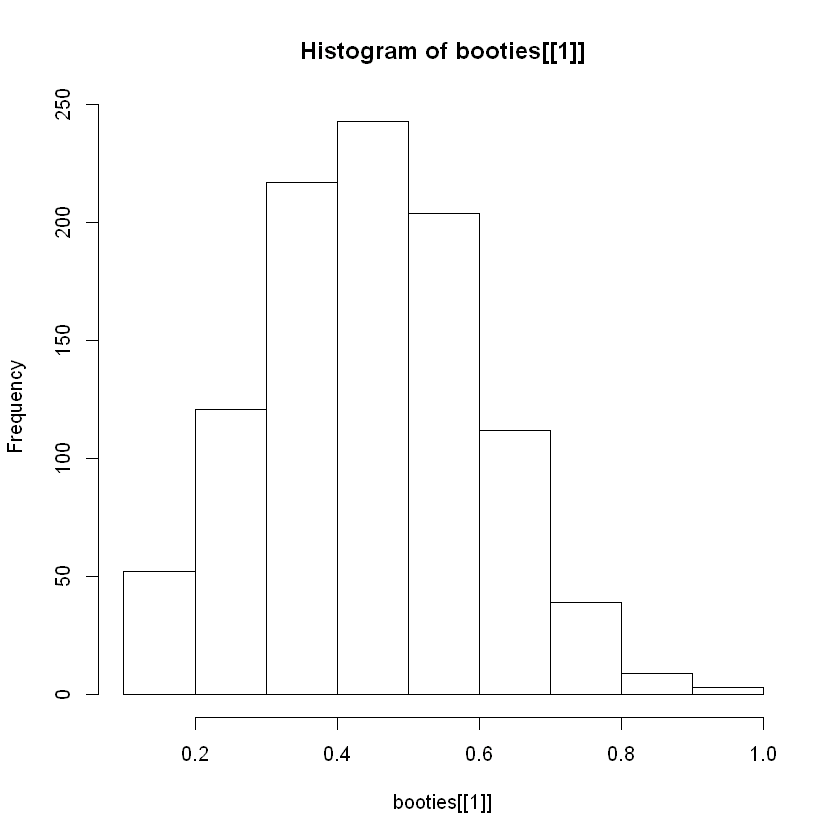

In [96]:
bootratios = function(data, NBS) {
    bootstraps = lapply(1:NBS, function(i) sample(data, replace=T))
    ratios = sapply(bootstraps, mean)
    return(list(ratios, sd(ratios)))
}

num = 10
p = 0.5
                        
datasample = rbinom(size=1, n=num, prob=p)
datasample
cat("Mean of original sample: ", mean(datasample), "\n")
cat("Std Dev from sample: ", sd(datasample), "\n")
    
booties = bootratios(datasample, 1000)

hist(booties[[1]])
# print(booties)
cat("Avg Bootstrap Mean:", mean(booties[[1]]), "\n")
cat("Bootstrap Std Dev:", booties[[2]][1], "\n")


[1] 1 0 0 0 1 0 0 0 1 1

Mean of original sample:  0.4 
Std Dev from sample:  0.5163978 
Avg Bootstrap Mean: 0.392 
Bootstrap Std Dev: 0.1532302 


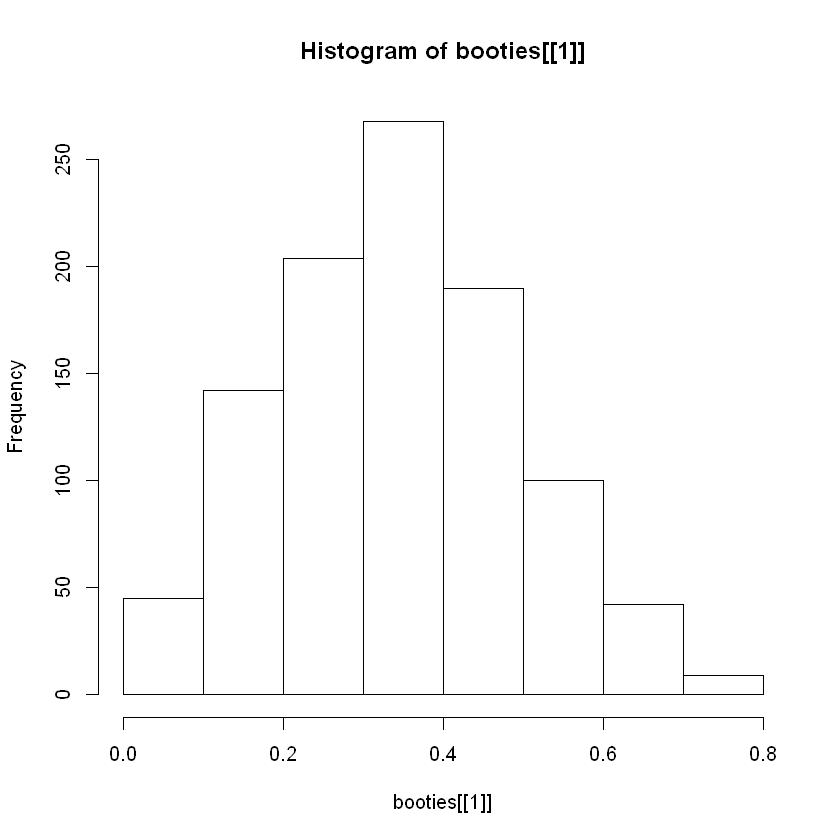

In [109]:
bootratios = function(data, NBS) {
    bootstraps = lapply(1:NBS, function(i) sample(data, replace=T))
    ratios = sapply(bootstraps, mean)
    return(list(ratios, sd(ratios)))
}

num = 10
p = 0.5
                        
datasample = rbinom(size=1, n=num, prob=p)
datasample
cat("Mean of original sample: ", mean(datasample), "\n")
cat("Std Dev from sample: ", sd(datasample), "\n")
    
booties = bootratios(datasample, 1000)

hist(booties[[1]])
# print(booties)
cat("Avg Bootstrap Mean:", mean(booties[[1]]), "\n")
cat("Bootstrap Std Dev:", booties[[2]][1], "\n")

In [111]:

# =============================
  # real world data
  N = 10000
healthconscious = runif(N)
# RUN THIS FIRST 
vitaminC = rbinom(n = N, prob =  3/4 * healthconscious  , size=1)

# RUN THIS THE SECOND TIME 
#vitaminC = rbinom(n = N, prob = .5, size=1)
exercise = rbinom(n = N, prob = .1 + healthconscious/3 , size=1)
life_exp = 70 + exercise * 10 + rnorm(N) # no vitamin C

# data we obtain
df = data.frame(vitaminC = vitaminC, life_exp = life_exp )
t.test(life_exp~vitaminC,df)


	Welch Two Sample t-test

data:  life_exp by vitaminC
t = -8.7073, df = 7448.758, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0194165 -0.6447579
sample estimates:
mean in group 0 mean in group 1 
       72.37148        73.20357 


In [112]:

# =============================
  # real world data
  N = 10000
healthconscious = runif(N)
# RUN THIS FIRST 
# vitaminC = rbinom(n = N, prob =  3/4 * healthconscious  , size=1)

# RUN THIS THE SECOND TIME 
vitaminC = rbinom(n = N, prob = .5, size=1)
exercise = rbinom(n = N, prob = .1 + healthconscious/3 , size=1)
life_exp = 70 + exercise * 10 + rnorm(N) # no vitamin C

# data we obtain
df = data.frame(vitaminC = vitaminC, life_exp = life_exp )
t.test(life_exp~vitaminC,df)


	Welch Two Sample t-test

data:  life_exp by vitaminC
t = 0.7602, df = 9967.615, p-value = 0.4471
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1084979  0.2459715
sample estimates:
mean in group 0 mean in group 1 
       72.66486        72.59612 


In [114]:
setwd("C:/Users/Jay/MIDSR")
load("GSS.Rdata")
print("Header of the data...", noquote=TRUE)
head(GSS)
print("Group by politics to see if it makes sense...", noquote=TRUE)
aggregate(id ~ politics, data = GSS, FUN = length)
print("Summary of the data...", noquote=TRUE)
summary(GSS)



[1] "Header of the data..."


id          wrkstat       marital agewed sibs childs age  birthmo   zodiac
1  1 Working fulltime      divorced     20    3      1  43      May   Taurus
2  2 Working fulltime never married      0    2      0  44   August    Virgo
3  3 Working fulltime      divorced     25    2      0  43 February Aquarius
4  4 Working parttime never married      0    4      0  45       NA       NA
5  5          Retired never married      0    1      0  78  October    Libra
6  6          Retired       married     25    2      2  83    March   Pisces
  educ      degree    sex  race     income91          region        xnorcsiz
1   11 High school   Male white $40000-49999 Middle Atlantic City, GT 250000
2   16    Bachelor   Male black $40000-49999 Middle Atlantic City, GT 250000
3   16    Bachelor Female white $40000-49999 Middle Atlantic City, GT 250000
4   15 High school Female white      Refused Middle Atlantic City, GT 250000
5   17    Graduate Female white      $75000+ Middle Atlantic City, GT 250000
6   11 High school   Male white $20000-22499 Middle Atlantic City, GT 250000
  vote92 cappun gunlaw     grass      relig     life         pillok sexeduc
1  voted Oppose Oppose Not Legal      Other  Routine            NAP     NAP
2  voted Oppose  Favor       NAP       None Exciting       Disagree   Favor
3  voted  Favor  Favor Not Legal   Catholic Exciting            NAP     NAP
4  voted  Favor    NAP        DK Protestant      NAP          Agree   Favor
5  voted Oppose  Favor       NAP Protestant Exciting Strongly Agree   Favor
6  voted  Favor  Favor Not Legal     Jewish  Routine            NAP     NAP
        spanking letdie1     news tvhours          bigband          blugrass
1            NAP     NAP      NAP       4       Dislike It        Dislike It
2 Strongly Agree     Yes Everyday       5          Like It    Mixed Feelings
3            NAP     NAP      NAP       2          Like It    Mixed Feelings
4       Disagree      No Everyday       4 DK Much About It Dislike Very Much
5          Agree      No Everyday       1          Like It    Mixed Feelings
6            NAP     NAP      NAP       4   Like Very Much    Mixed Feelings
         country          blues       musicals          classicl
1 Mixed Feelings        Like It        Like It Like It Very Much
2 Mixed Feelings Like Very Much        Like It Like It Very Much
3 Mixed Feelings Mixed Feelings Like Very Much Like It Very Much
4 Mixed Feelings Mixed Feelings Mixed Feelings Like It Very Much
5     Dislike It Like Very Much        Like It Like It Very Much
6 Mixed Feelings Like Very Much        Like It  DK Much About It
               folk              jazz             opera               rap
1    Mixed Feelings           Like It           Like It Dislike Very Much
2           Like It Like It Very Much    Like Very Much        Dislike It
3           Like It    Mixed Feelings    Like Very Much        Dislike It
4 Dislike Very Much           Like It Dislike Very Much Dislike Very Much
5    Like Very Much Like It Very Much    Like Very Much  DK Much About It
6    Mixed Feelings Like It Very Much Dislike Very Much    Mixed Feelings
           hvymetal attsprts visitart      scitest4   partners      sexfreq
1 Dislike Very Much       No      Yes            NA  1 Partner Once a Month
2 Dislike Very Much       No      Yes Probably True 2 Partners Once a Month
3        Dislike It       No      Yes Probably True  1 Partner 2-3 Per Week
4 Dislike Very Much       No      Yes            DK        NAP          NAP
5  DK Much About It      Yes      Yes            NA         NA           NA
6 Dislike Very Much       No       No Probably True  1 Partner Once a Month
    dwelown cohort     politics
1       nap   1950    Tend Cons
2 pays rent   1949      Liberal
3       nap   1950 Conservative
4 pays rent   1948     Moderate
5 pays rent   1915     Tend Lib
6       nap   1910      Liberal

[1] "Group by politics to see if it makes sense..."


politics  id
1      Liberal 193
2     Tend Lib 193
3     Moderate 527
4    Tend Cons 248
5 Conservative 282

[1] "Summary of the data..."


       id                     wrkstat             marital        agewed     
 Min.   :   1.0   Working fulltime:747   married      :795   Min.   : 0.00  
 1st Qu.: 396.8   Retired         :231   widowed      :165   1st Qu.:18.00  
 Median : 803.5   Keeping house   :200   divorced     :213   Median :21.00  
 Mean   : 801.1   Working parttime:161   separated    : 40   Mean   :19.06  
 3rd Qu.:1199.2   Unempl, laid off: 51   never married:286   3rd Qu.:24.00  
 Max.   :1606.0   School          : 42   NA           :  1   Max.   :99.00  
                  (Other)         : 68                                      
      sibs           childs           age           birthmo   
 Min.   : 0.00   Min.   :0.000   Min.   :18.0   March   :154  
 1st Qu.: 2.00   1st Qu.:0.000   1st Qu.:33.0   July    :144  
 Median : 3.00   Median :2.000   Median :43.0   August  :137  
 Mean   : 4.03   Mean   :1.875   Mean   :46.4   January :133  
 3rd Qu.: 5.00   3rd Qu.:3.000   3rd Qu.:59.0   June    :131  
 Max. 

In [258]:
cat("Question 14. chi-square test on marital and politics", "\n\n")

setwd("C:/Users/Jay/MIDSR")
load("GSS.Rdata")

cat("Marital field, before cleanup...\n")
summary(GSS$marital)

# Let's get rid of that "NA"!
GSS1 = GSS[GSS$marital!="NA",]
cat("Marital field, after cleanup...\n")
summary(GSS1$marital)

cat("Politics field, before cleanup...\n")
summary(GSS1$politics)
# Get rid of THOSE "NA"s!
GSS1 = GSS1[!is.na(GSS1$politics),]
cat("Politics field, after cleanup...\n")
summary(GSS1$politics)

table(GSS1$marital, GSS1$politics)

chisq = chisq.test(GSS1$marital, GSS1$politics)

cat("Expected values shouldn't be less than 5, or Fischer's Exact test is indicated...", "\n")
chisq$expected

cat("Looks okay!  So what did we get?", "\n")
print(chisq)

cat("Residuals...")
chisq$residuals

cat("Observed...")
chisq$observed

# Use Cramer's V function to find effect size...
cat("Cramer's V:", sqrt(chisq$statistic / (sum(chisq$observed) * (min(dim(chisq$observed))-1))), 
    " = weak effect size\n\n\n")

cat("Question 15. Pearson correlation on agewed and tvhours\n\n")
# Fix up agewed and turn 0s and 99s into NA's
GSS$agewed[GSS$agewed==0] = NA
GSS$agewed[GSS$agewed==99] = NA

GSS$tvhours[GSS$tvhours>24] = 24

cat("Summary of tvhours to make sure <=24 hours...")
summary(GSS$tvhours)

cat("Summary of agewed...")
summary(GSS$agewed)

# This ignore NA's, so we're okay with agewed
cor.test(GSS$agewed, GSS$tvhours)

# country_cor = cor(GSS[,"gdp", "cpi", "total.takedowns")], use = "pairwise.complete.obs")
# output is a matrix so we can calculate R-squared and see shared variability
# country_cor**2

cat("\n", "Question 16. Wilcox rank-sum test on married and childs", "\n\n")

cat("Summary of marital field...\n")
summary(GSS$marital)
cat("Summary of childs field...\n")
summary(GSS$childs)

# Let's zap out that NA again...
GSS2 = GSS[GSS$marital!="NA",]

cat("Summary of marital field after cleanup...\n")
summary(GSS2$marital)

dummy = (GSS2$marital=="married" | GSS2$marital=="separated")
cat("Count of marital = married or separated: ", sum(dummy), "\n")

# Add new dummy variable married = 1 if married, 0 if not
GSS2$married = 0 # Default value
GSS2[dummy,]$married = 1

cat("Count of currently married (new field) to see if it matches: ", sum(GSS2$married), "\n\n")

cat("Summary of new married field for 23 year olds only")
summary(GSS2$married[GSS2$age==23])

# filter down to just 23 year olds...
GSS2 = GSS2[GSS2$age==23, ]

wilcox.test(GSS2$childs ~ GSS2$married)

# Use Cohen's D for effect size...
cohens = function(x, y) {
   numerator = (length(x) - 1) * var(x, na.rm=T) + (length(y)-1) * var(y, na.rm=T)
   denominator = length(x) + length(y) - 2
   pooledstddev = sqrt(numerator / denominator)
   cohensd = abs(mean(x, na.rm=T) - mean(y, na.rm=T)) / pooledstddev
   return(cohensd)
}

cat("Cohen's D: ", cohens(GSS2$childs, GSS2$married), "= small effect size\n\n\n")


cat("Question 17. ANOVA on relig and agewed\n\n")

cat("agewed summary...")
summary(GSS$agewed)

cat("relig summary...")
summary(GSS$relig)

# Let's zap out NA's again (and that one "don't know" record)...
GSS3 = GSS[!is.na(GSS$agewed),]
GSS3 = GSS3[GSS3$relig!="NA",]
GSS3 = GSS3[GSS3$relig!="DK",]

# Did we get them all?
cat("After removing nulls and DK: new agewed summary...")
summary(GSS3$agewed)

cat("new relig summary...")
summary(GSS3$relig)

test = aov(GSS3$agewed ~ GSS3$relig)
summary(test)

# Now we can check each mean against every other mean, using bonferroni
# to avoid a bunch of false positives...
pairwise.t.test(GSS3$agewed, GSS3$relig, p.adjust.method = "bonferroni")

cat("It looks like the Protestants are different from most of the others...\n")
cat("Summary of Protestant agewed...", "\n")
summary(GSS3$agewed[GSS3$relig=='Protestant'])

cat("Summary of Catholic, Jewish, and other...", "\n")
summary(GSS3$agewed[GSS3$relig=='Catholic'])
summary(GSS3$agewed[GSS3$relig=='Jewish'])
summary(GSS3$agewed[GSS3$relig=='Other'])

cat("Not significantly different than 'None'...\n")
summary(GSS3$agewed[GSS3$relig=='None'])




Question 14. chi-square test on marital and politics 

Marital field, before cleanup...


married       widowed      divorced     separated never married 
          795           165           213            40           286 
           NA 
            1

Marital field, after cleanup...


married       widowed      divorced     separated never married 
          795           165           213            40           286 
           NA 
            0

Politics field, before cleanup...


Liberal     Tend Lib     Moderate    Tend Cons Conservative         NA's 
         192          193          527          248          282           57

Politics field, after cleanup...


Liberal     Tend Lib     Moderate    Tend Cons Conservative 
         192          193          527          248          282

               
                Liberal Tend Lib Moderate Tend Cons Conservative
  married            93       92      271       140          173
  widowed            15       16       57        24           37
  divorced           22       36       79        38           29
  separated           7        3       22         6            1
  never married      55       46       98        40           42
  NA                  0        0        0         0            0

Expected values shouldn't be less than 5, or Fischer's Exact test is indicated... 


GSS1$politics
GSS1$marital       Liberal   Tend Lib  Moderate  Tend Cons Conservative
  married       102.391123 102.924411 281.04230 132.255201   150.386963
  widowed        19.839112  19.942441  54.45423  25.625520    29.138696
  divorced       27.162275  27.303745  74.55479  35.084605    39.894591
  separated       5.192788   5.219834  14.25312   6.707351     7.626907
  never married  37.414702  37.609570 102.69556  48.327323    54.952843

Looks okay!  So what did we get? 

	Pearson's Chi-squared test

data:  GSS1$marital and GSS1$politics
X-squared = 44.2255, df = 16, p-value = 0.0001823

Residuals...

               GSS1$politics
GSS1$marital       Liberal   Tend Lib   Moderate  Tend Cons Conservative
  married       -0.9280821 -1.0768094 -0.5990284  0.6734475    1.8439698
  widowed       -1.0864371 -0.8828279  0.3449875 -0.3211116    1.4563291
  divorced      -0.9905081  1.6642600  0.5148195  0.4921972   -1.7248603
  separated      0.7930651 -0.9716102  2.0519738 -0.2731237   -2.3995878
  never married  2.8749387  1.3681541 -0.4633527 -1.1978682   -1.7473103

Observed...

               GSS1$politics
GSS1$marital    Liberal Tend Lib Moderate Tend Cons Conservative
  married            93       92      271       140          173
  widowed            15       16       57        24           37
  divorced           22       36       79        38           29
  separated           7        3       22         6            1
  never married      55       46       98        40           42

Cramer's V: 0.08756363  = weak effect size


Question 15. Pearson correlation on agewed and tvhours

Summary of tvhours to make sure <=24 hours...

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   2.000   3.055   4.000  24.000 

Summary of agewed...

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.00   19.00   22.00   22.79   25.00   58.00     298 


	Pearson's product-moment correlation

data:  GSS$agewed and GSS$tvhours
t = 0.2918, df = 1200, p-value = 0.7705
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04814084  0.06493617
sample estimates:
      cor 
0.0084246 



 Question 16. Wilcox rank-sum test on married and childs 

Summary of marital field...


married       widowed      divorced     separated never married 
          795           165           213            40           286 
           NA 
            1

Summary of childs field...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   1.875   3.000   9.000 

Summary of marital field after cleanup...


married       widowed      divorced     separated never married 
          795           165           213            40           286 
           NA 
            0

Count of marital = married or separated:  835 
Count of currently married (new field) to see if it matches:  835 

Summary of new married field for 23 year olds only

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2857  1.0000  1.0000 

Warning message:
In wilcox.test.default(x = c(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, : cannot compute exact p-value with ties


	Wilcoxon rank sum test with continuity correction

data:  GSS2$childs by GSS2$married
W = 19, p-value = 0.0002656
alternative hypothesis: true location shift is not equal to 0


Cohen's D:  0.2885683 = small effect size


Question 17. ANOVA on relig and agewed

agewed summary...

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  13.00   19.00   22.00   22.79   25.00   58.00     298 

relig summary...

Protestant   Catholic     Jewish       None      Other         DK         NA 
       953        333         31        140         35          1          7

After removing nulls and DK: new agewed summary...

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   19.00   22.00   22.78   25.00   58.00 

new relig summary...

Protestant   Catholic     Jewish       None      Other         DK         NA 
       787        265         23         95         26          0          0

              Df Sum Sq Mean Sq F value   Pr(>F)    
GSS3$relig     4    811  202.64   8.197 1.61e-06 ***
Residuals   1191  29444   24.72                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Pairwise comparisons using t tests with pooled SD 

data:  GSS3$agewed and GSS3$relig 

         Protestant Catholic Jewish  None   
Catholic 0.00097    -        -       -      
Jewish   0.01263    0.62106  -       -      
None     0.49274    1.00000  0.43398 -      
Other    0.01417    0.80224  1.00000 0.55751

P value adjustment method: bonferroni 

It looks like the Protestants are different from most of the others...
Summary of Protestant agewed... 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  13.00   19.00   21.00   22.25   24.00   58.00 

Summary of Catholic, Jewish, and other... 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   20.00   23.00   23.63   26.00   49.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   22.50   26.00   25.65   28.00   37.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   22.25   26.00   25.42   27.00   32.00 

Not significantly different than 'None'...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   20.00   22.00   23.32   26.00   38.00 

In [270]:
summary(GSS$relig[GSS$sex=='Male'])
summary(GSS$relig[GSS$sex=='Female'])


Protestant   Catholic     Jewish       None      Other         DK         NA 
       389        130         19         83         15          1          4

Protestant   Catholic     Jewish       None      Other         DK         NA 
       564        203         12         57         20          0          3

[1] "What.city.do.you.live.in."                                                      
 [2] "What.state.or.province.do.you.live.in..if.applicable."                          
 [3] "What.country.do.you.live.in."                                                   
 [4] "What.is.your.age."                                                              
 [5] "How.often.do.you.try.to.make.other.people.happy."                               
 [6] "Are.your.surroundings.physically.safe."                                         
 [7] "Do.the.people.you.re.close.to..family.friends..love.and.support.you."           
 [8] "How.often.do.you.listen.to.music.you.enjoy."                                    
 [9] "How.often.do.you.use.technology..games..social.media..etc...for.entertainment.."
[10] "How.many.hours.of.uninterrupted.sleep.do.you.get.each.night."                   
[11] "How.often.are.you.outdoors."                                                    
[12] "Do.you.feel.respected.by.other.people."                                         
[13] "How.much.exercise.do.you.get.weekly."                                           
[14] "How.often.do.you.smile.every.day."                                              
[15] "Do.you.love.and.appreciate.yourself."                                           
[16] "How.often.do.you.feel.happy.with.what.you.do.every.day..e.g..work..school.."    
[17] "How.often.do.you.argue.with.people.who.are.close.to.you."

[1] "How.often.do.you.smile.every.day."
[1] "Do.you.love.and.appreciate.yourself."



	Welch Two Sample t-test

data:  DF$smilefreq and DF$loveself
t = 6.6726, df = 4980.421, p-value = 2.786e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1440651 0.2639380
sample estimates:
mean of x mean of y 
 3.925853  3.721852 


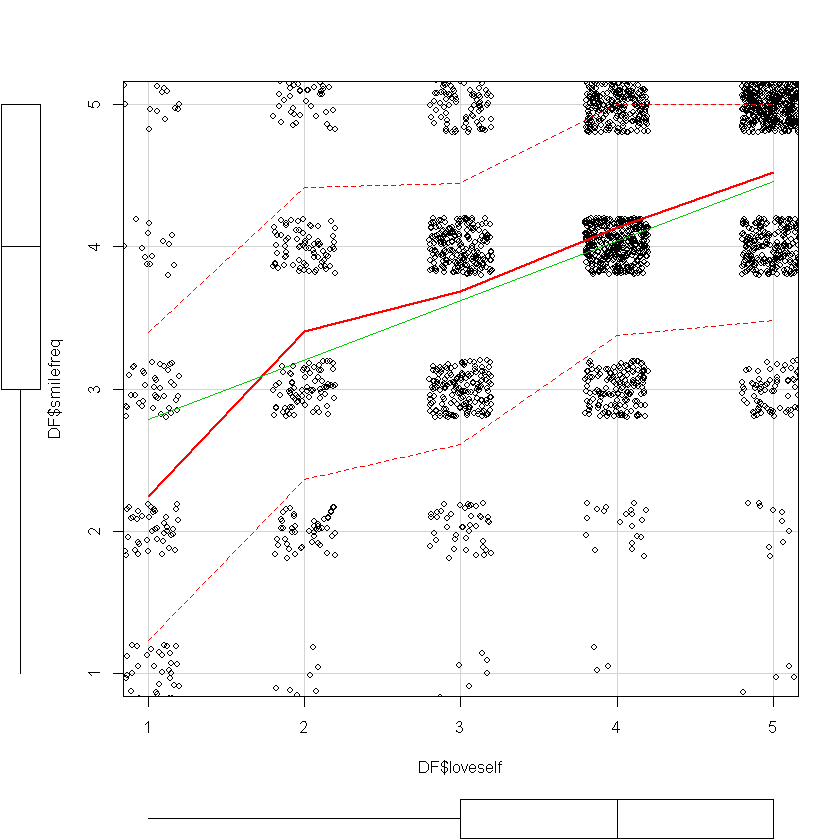

In [307]:
setwd("C:/Users/Jay/MIDSR")
DF = read.csv("Happiness.csv", header=TRUE)

# summary(DF)

colnames(DF)

print(names(DF[14]))  # How.often.do.you.smile.every.day.
print(names(DF[15]))  # Do.you.love.and.appreciate.yourself.
# DF$blah = D$blahblah.blah
# names(DF)[3] = 'blah'

names(DF)[14] = 'smilefreq'
names(DF)[15] = 'loveself'

t.test(DF$smilefreq,DF$loveself,paired = F)

# ggplot...
# + geom_jitter(width=0.25, height=0.25)

# or jitter=list(x=1, y=1)) in scatterplot 

library(ggplot2)
library(car)

scatterplot(DF$loveself,DF$smilefreq, jitter=list(x=1,y=1))



In [303]:
print(cor.test(DF$loveself, DF$smilefreq))
print(0.4874828^2)


	Pearson's product-moment correlation

data:  DF$loveself and DF$smilefreq
t = 28.1769, df = 2547, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4573139 0.5165309
sample estimates:
      cor 
0.4874828 

[1] 0.2376395


In [308]:
cor.test(DF$loveself, DF$smilefreq)
cor(DF[,c("loveself", "smilefreq")], use="pairwise.complete.obs")


	Pearson's product-moment correlation

data:  DF$loveself and DF$smilefreq
t = 28.1769, df = 2547, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4573139 0.5165309
sample estimates:
      cor 
0.4874828 


loveself smilefreq
loveself  1.0000000 0.4874828
smilefreq 0.4874828 1.0000000

In [297]:
model1 = lm(loveself~smilefreq, data=DF)
summary(model1)

# model1 = lm(loveself~0+smilefreq, data=DF) for no intercept

# testing three hypotheses... intercept = 0?  smilefreq coefficient = 0?  omnibus (f stat) are you doing better than mean overall

# 4 times as many data points = std err drops by 1/2.  (related to 1/sqrt(n))
# Degrees of freedom = n - 2

# Adjusted-R penalizes model by number of variables being included.




Call:
lm(formula = loveself ~ smilefreq, data = DF)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3324 -0.7640  0.2360  0.6676  2.9411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.49048    0.08174   18.23   <2e-16 ***
smilefreq    0.56838    0.02017   28.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.023 on 2547 degrees of freedom
Multiple R-squared:  0.2376,	Adjusted R-squared:  0.2373 
F-statistic: 793.9 on 1 and 2547 DF,  p-value: < 2.2e-16


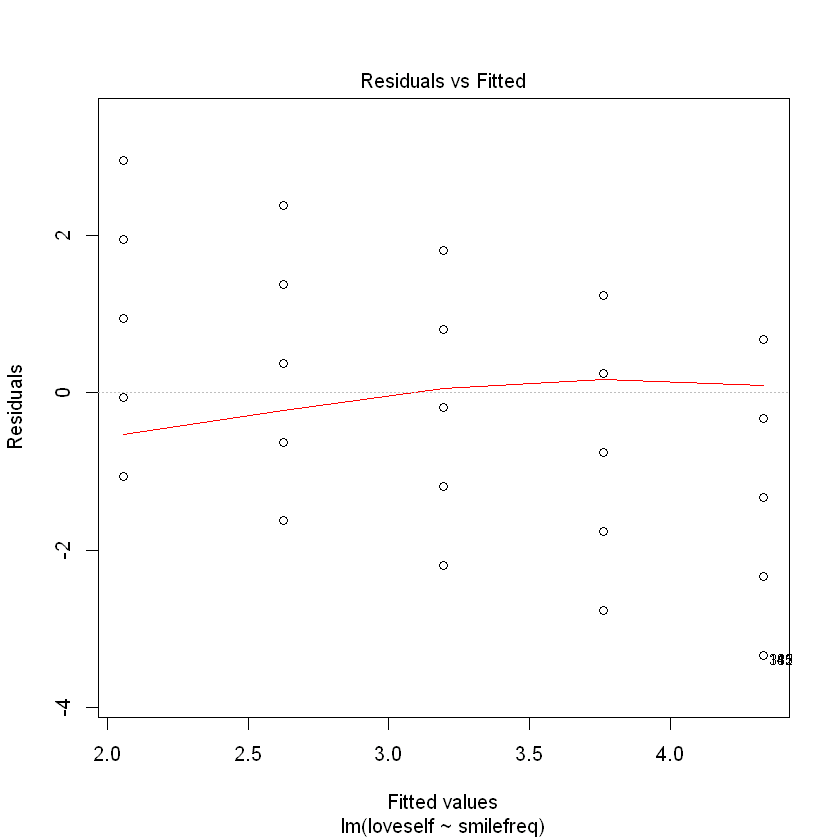

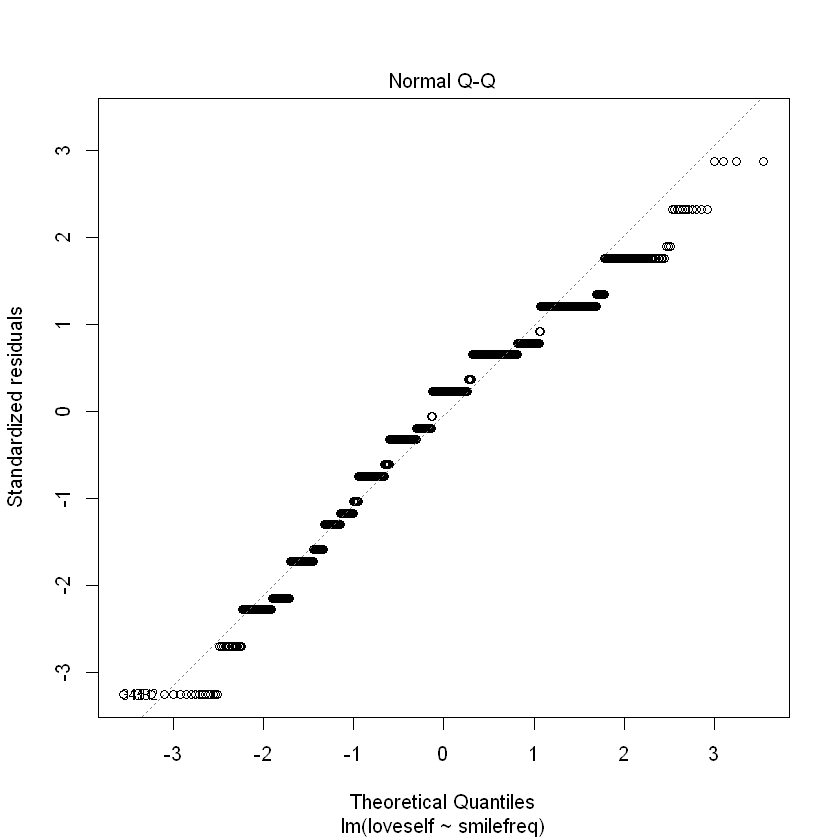

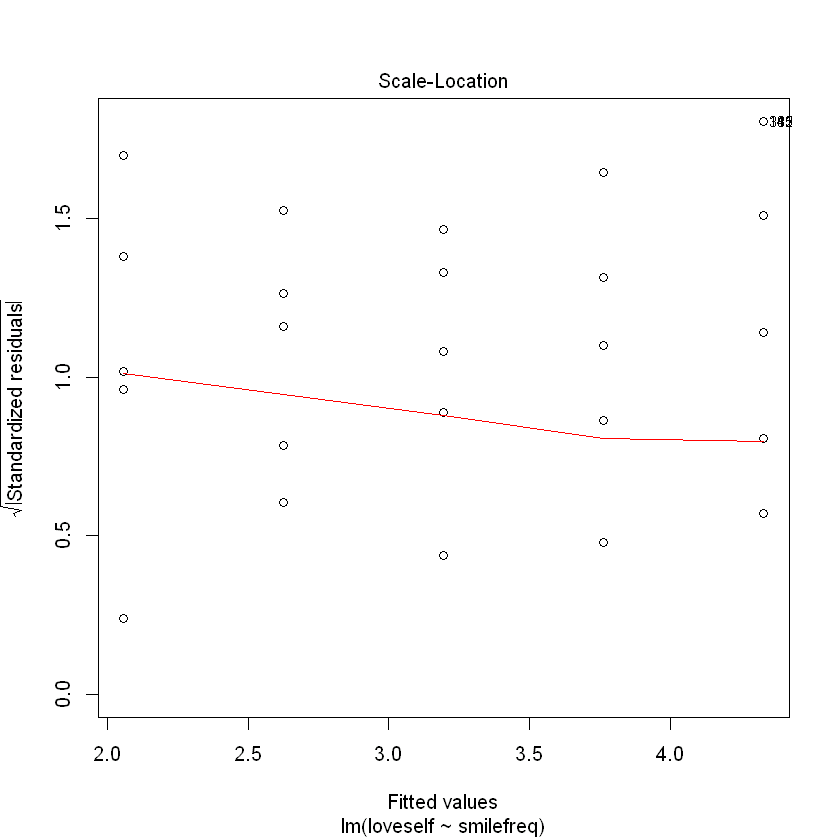

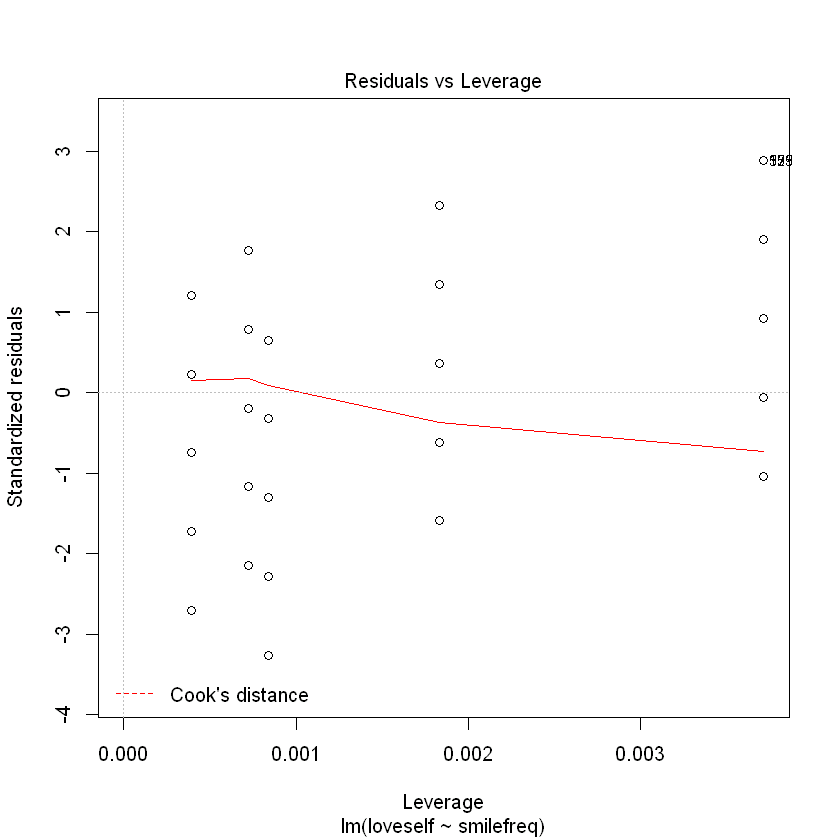

In [306]:
plot(model1)
# don't sweat QQ plot if n>= about 100

In [314]:
# Add random noise and see R-squared go up
x=rnorm(dim(DF)[1])
model3 = lm(loveself ~ smilefreq+x, data=DF)
summary(model3)


Call:
lm(formula = loveself ~ smilefreq + x, data = DF)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3444 -0.7516  0.2320  0.6724  2.9571 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.490262   0.081759  18.227   <2e-16 ***
smilefreq    0.568474   0.020177  28.175   <2e-16 ***
x           -0.008045   0.020510  -0.392    0.695    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.023 on 2546 degrees of freedom
Multiple R-squared:  0.2377,	Adjusted R-squared:  0.2371 
F-statistic: 396.9 on 2 and 2546 DF,  p-value: < 2.2e-16


In [361]:
load("GSS_daughters.rdata")


partyid age agewed    sex      relig educ       marital
2  not str republican  59     20   male   catholic   12       married
3        ind,near dem  NA     28 female protestant   12       married
8     strong democrat  25     NA   male      other   12 never married
13  strong republican  55     29   male      other   16       married
14    strong democrat  56     22   male protestant   16       married
17    strong democrat  52     32 female     jewish   18       married
         xnorcsiz  race born         income             polviews        happy
2  city gt 250000 black   no           <NA>             moderate   very happy
3  city gt 250000 black   no $15000 - 19999 slghtly conservative pretty happy
8  city gt 250000 black   no $10000 - 14999         conservative   very happy
13 city gt 250000 white   no $25000 or more         conservative   very happy
14 city gt 250000 white  yes $25000 or more     slightly liberal   very happy
17 city gt 250000 white  yes $25000 or more             moderate pretty happy
   kdsex1 daughter1 partyid.num polviews.num
2  female         1           6            4
3  female         1           3            5
8    male         0           1            6
13 female         1           7            6
14   male         0           1            3
17   male         0           1            4

               partyid         age            agewed          sex     
 not str democrat  :237   Min.   :19.00   Min.   :13.00   male  :413  
 not str republican:202   1st Qu.:36.00   1st Qu.:19.00   female:680  
 strong democrat   :164   Median :47.00   Median :21.00               
 independent       :137   Mean   :49.63   Mean   :22.36               
 strong republican :135   3rd Qu.:62.00   3rd Qu.:25.00               
 ind,near dem      :126   Max.   :89.00   Max.   :56.00               
 (Other)           : 92   NA's   :1       NA's   :72                  
        relig          educ                marital                xnorcsiz  
 protestant:703   Min.   : 0.00   married      :676   suburb, lrg city:229  
 catholic  :265   1st Qu.:12.00   widowed      :133   suburb, med city:189  
 none      : 69   Median :12.00   divorced     :187   city gt 250000  :173  
 other     : 43   Mean   :12.91   separated    : 36   city,50-250000  :160  
 jewish    : 12   3rd Qu.:15.00   never married

NULL

[1] "Should be 530 ones??"


   
    iap male female  dk  na
  0   0  574      0   0   0
  1   0    0    519   0   0

partyid age agewed    sex      relig educ       marital
2  not str republican  59     20   male   catholic   12       married
3        ind,near dem  NA     28 female protestant   12       married
8     strong democrat  25     NA   male      other   12 never married
13  strong republican  55     29   male      other   16       married
14    strong democrat  56     22   male protestant   16       married
17    strong democrat  52     32 female     jewish   18       married
         xnorcsiz  race born         income             polviews        happy
2  city gt 250000 black   no           <NA>             moderate   very happy
3  city gt 250000 black   no $15000 - 19999 slghtly conservative pretty happy
8  city gt 250000 black   no $10000 - 14999         conservative   very happy
13 city gt 250000 white   no $25000 or more         conservative   very happy
14 city gt 250000 white  yes $25000 or more     slightly liberal   very happy
17 city gt 250000 white  yes $25000 or more             moderate pretty happy
   kdsex1 daughter1 partyid.num polviews.num
2  female         1           6            4
3  female         1           3            5
8    male         0           1            6
13 female         1           7            6
14   male         0           1            3
17   male         0           1            4

strong democrat   not str democrat       ind,near dem        independent 
               164                237                126                137 
      ind,near rep not str republican  strong republican        other party 
                92                202                135                  0 
                dk                 na 
                 0                  0

[1] "strong democrat"    "not str democrat"   "ind,near dem"      
 [4] "independent"        "ind,near rep"       "not str republican"
 [7] "strong republican"  "other party"        "dk"                
[10] "na"

                    
                       1   2   3   4   5   6   7
  strong democrat    164   0   0   0   0   0   0
  not str democrat     0 237   0   0   0   0   0
  ind,near dem         0   0 126   0   0   0   0
  independent          0   0   0 137   0   0   0
  ind,near rep         0   0   0   0  92   0   0
  not str republican   0   0   0   0   0 202   0
  strong republican    0   0   0   0   0   0 135
  other party          0   0   0   0   0   0   0
  dk                   0   0   0   0   0   0   0
  na                   0   0   0   0   0   0   0

[1] partyid      age          agewed       sex          relig       
 [6] educ         marital      xnorcsiz     race         born        
[11] income       polviews     happy        kdsex1       daughter1   
[16] partyid.num  polviews.num
<0 rows> (or 0-length row.names)


Call:
lm(formula = partyid.num ~ daughter1, data = GSS)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0286 -1.7423 -0.0286  1.9714  4.2577 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.74227    0.08684   43.09   <2e-16 ***
daughter1    0.28630    0.12610    2.27   0.0234 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.095 on 1105 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.004643,	Adjusted R-squared:  0.003743 
F-statistic: 5.155 on 1 and 1105 DF,  p-value: 0.02337



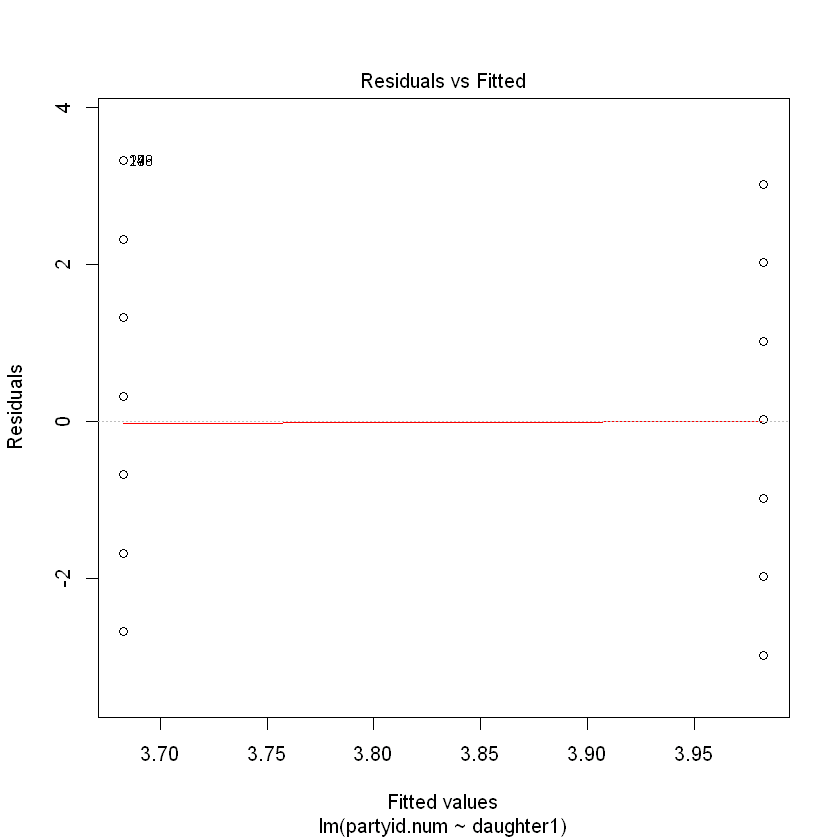

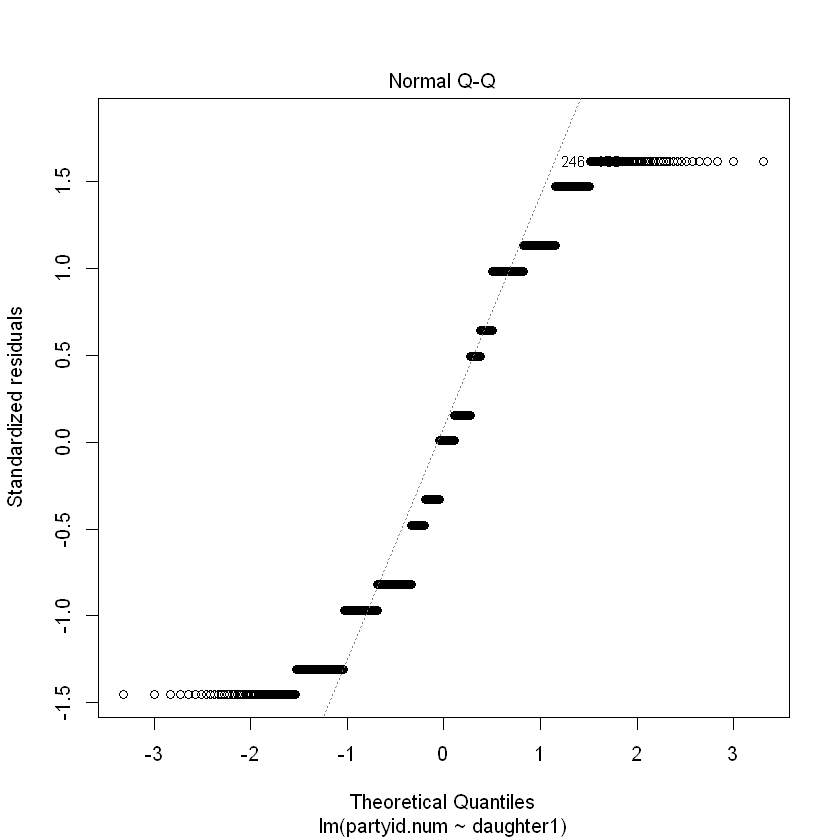

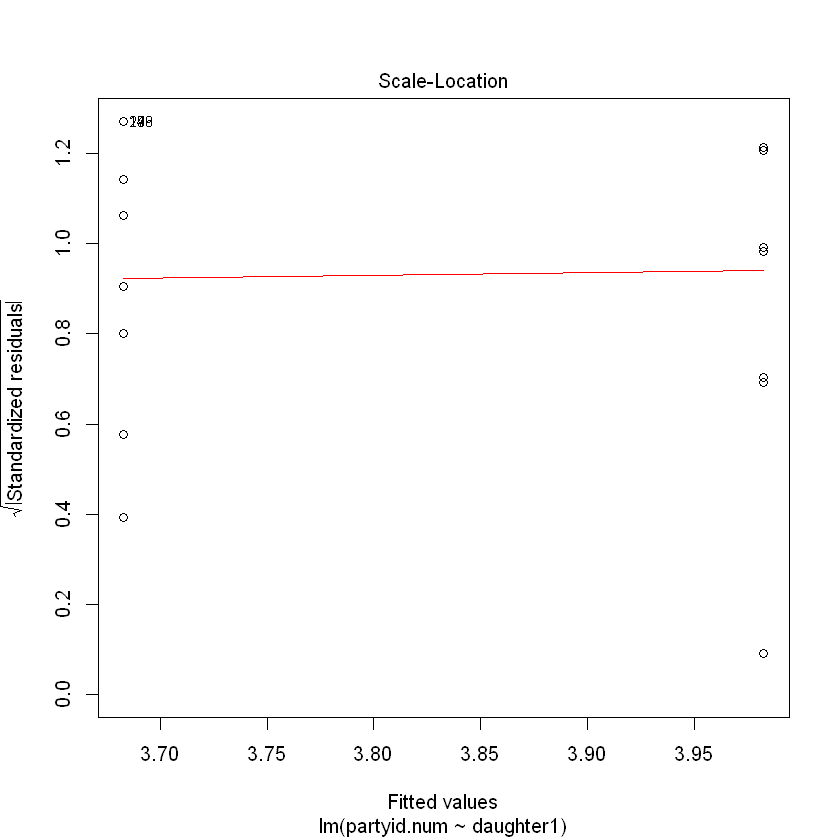

2     3     8    13    14    17    26    29    30    34    39    47    51 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   54    59    62    64    66    72    74    75    76    79    80    85    87 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   88    91    95    97   100   102   108   109   112   119   121   123   127 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  130   132   133   136   137   141   142   143   146   147   148   150   156 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  157   160   162   163   170   171   172   174   177   179   182   183   185 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  191   193   196   198   199   201   202   211   216   217   218   220   223 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  224   234   242   246   248   250   251   254   257   261   262   267   269 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  271   273   276   279   281   282   287   291   293   294   296   298   299 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  300   301   304   305   308   309   314   316   317   318   323   324   325 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  327   328   334   335   344   345   346   349   351   356   358   360   362 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  365   367   371   379   381   383   385   386   390   395   398   399   401 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  405   407   410   416   420   421   424   426   430   431   435   437   438 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  445   446   452   455   464   465   468   471   472   473   475   485   486 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  487   495   497   501   504   506   507   511   515   518   521   523   524 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  525   527   528   530   532   533   535   536   539   543   544   548   551 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  552   553   555   556   560   561   562   573   575   576   580   584   586 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  587   588   589   595   601   608   609   611   612   613   617   619   620 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  628   634   643   647   648   649   651   657   658   670   675   682   691 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  693   696   697   699   701   704   709   712   713   714   718   719   722 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  724   728   730   734   735   736   742   743   744   745   748   750   752 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  754   764   766   767   769   774   775   778   781   782   783   784   788 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  791   793   795   796   798   800   805   808   809   811   812   818   820 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  823   824   829   833   834   835   842   844   846   850   851   852   856 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  857   865   866   868   869   870   873   874   878   879   881   883   887 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  889   890   893   896   899   911   913   922   923   928   930   932   933 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
  936   938   939   940   941   943   948   950   954 

named integer(0)

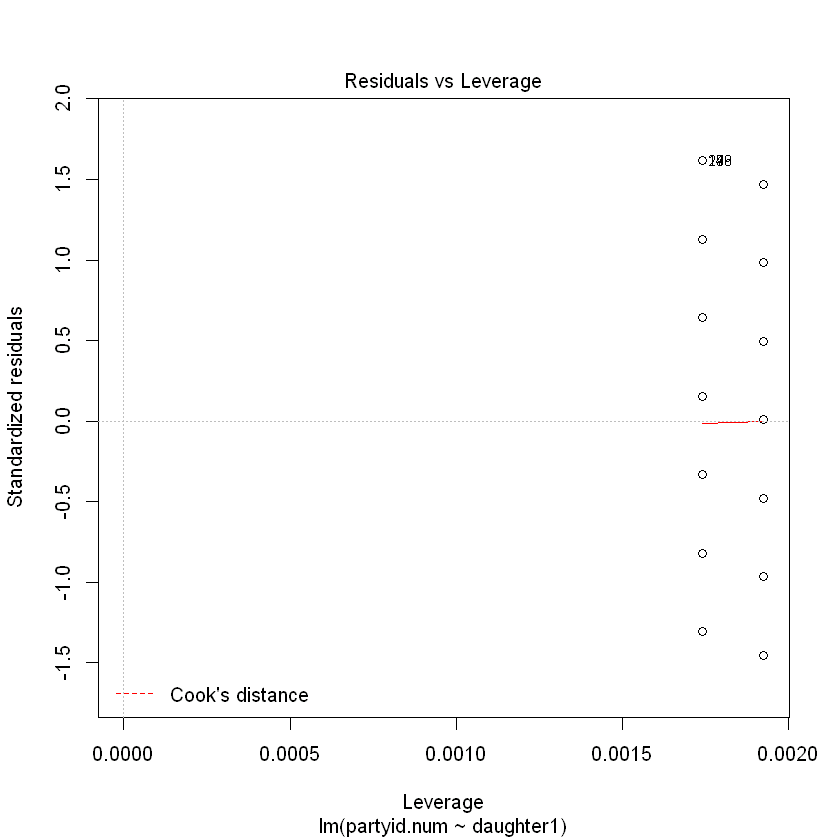

In [380]:
head(GSS)
summary(GSS)

desc = function(var, df) {
attr(df,"var.labels")[match(var, colnames(df))]
}

desc("partyid",GSS)

# cbind(names = colnames(GSS), labels = attr(GSS, "var.labels"))

# GSS$daughter1 = as.numeric(GSS$kdsex1=='female')
GSS$daughter1 = ifelse(GSS$kdsex1 == "female", 1, 0)

print("Should be 530 ones??")

table(GSS$daughter1, GSS$kdsex1)
head(GSS)

GSS = subset(GSS, partyid!= "other party")

summary(GSS$partyid)
levels(GSS$partyid)

# reduce the dataframe down to the rows that work so models are on the same data!
# selected.vars = c('repub.partyid','daughter1','educ')
# GSSsub = subset(GSS, select = selected.vars)
# GSSsub = subset(GSSsub, subset = complete.cases(GSSsub))

# m1<- lm(repub.partyid~daughter1     , data=GSSsub) 
# m2<- lm(repub.partyid~daughter1+educ, data=GSSsub) 
# anova(m1,m2)


GSS$partyid.num <- as.numeric(GSS$partyid)
GSS[GSS$partyid.num > 7, "partyid.num"] <- NA 
GSS[GSS$partyid.num ==8, "partyid.num"] <- NA 

table(GSS$partyid, GSS$partyid.num)

GSS[GSS$partyid.num>7,]

#simple model
model1 <- lm(partyid.num ~ daughter1, GSS)
sum1 = summary(party.by.daughter)
print(sum1)
plot(model1)

# cooks.distance(model1) > 1
which(cooks.distance(model1) > 1)





Call:
lm(formula = partyid.num ~ daughter1 + educ, data = GSS)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5960 -1.8543 -0.0793  2.0069  3.9543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.56239    0.28679   8.935  < 2e-16 ***
daughter1    0.31106    0.12375   2.514   0.0121 *  
educ         0.08613    0.02106   4.090 4.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.04 on 1088 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.02017,	Adjusted R-squared:  0.01837 
F-statistic:  11.2 on 2 and 1088 DF,  p-value: 1.535e-05



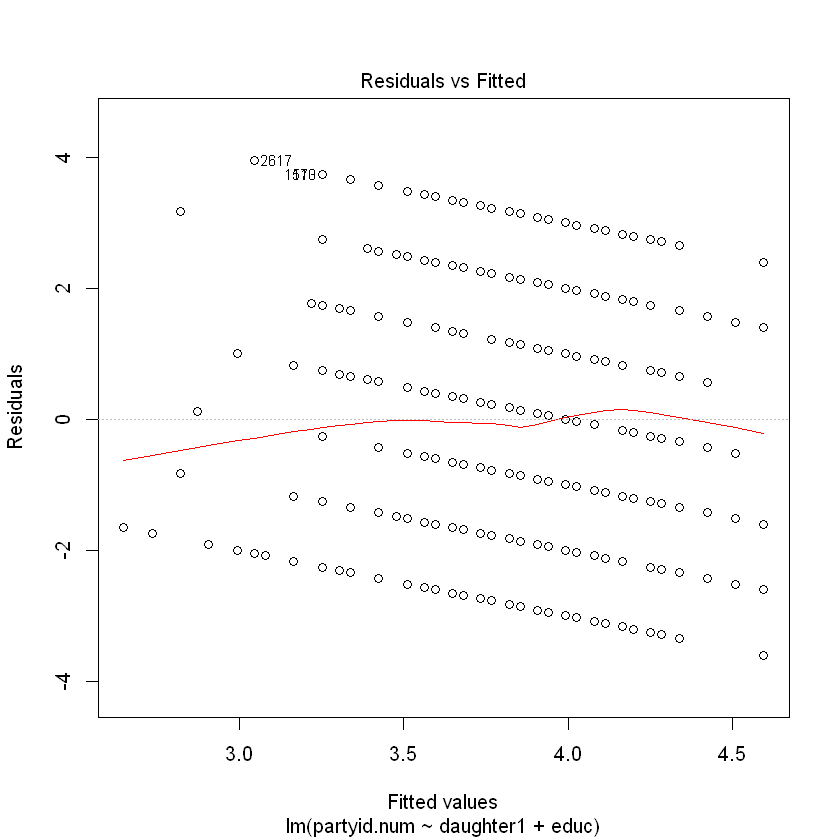

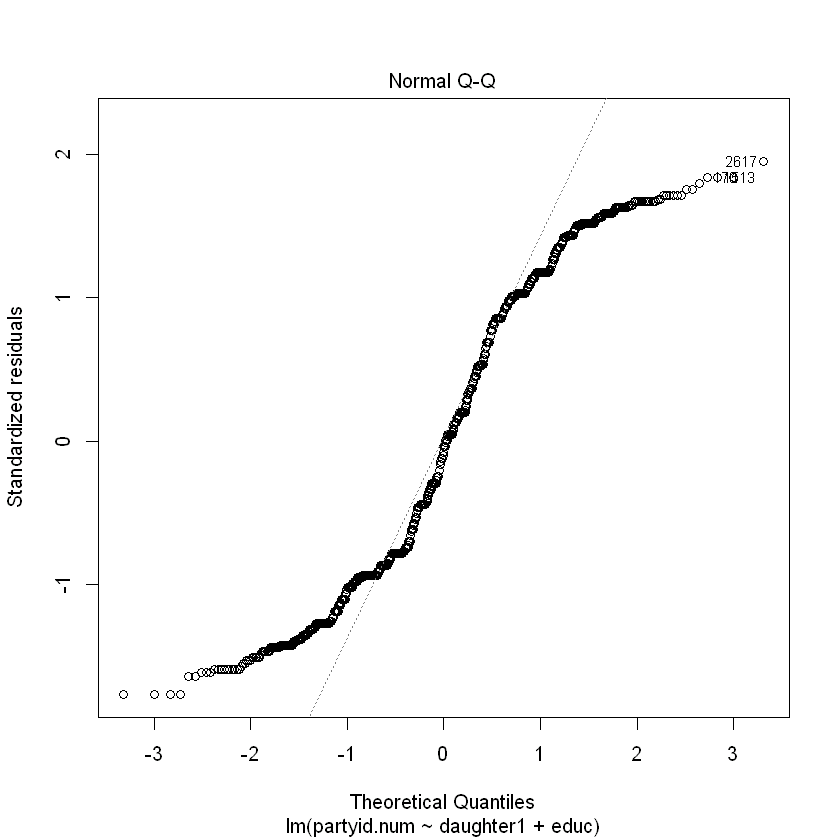

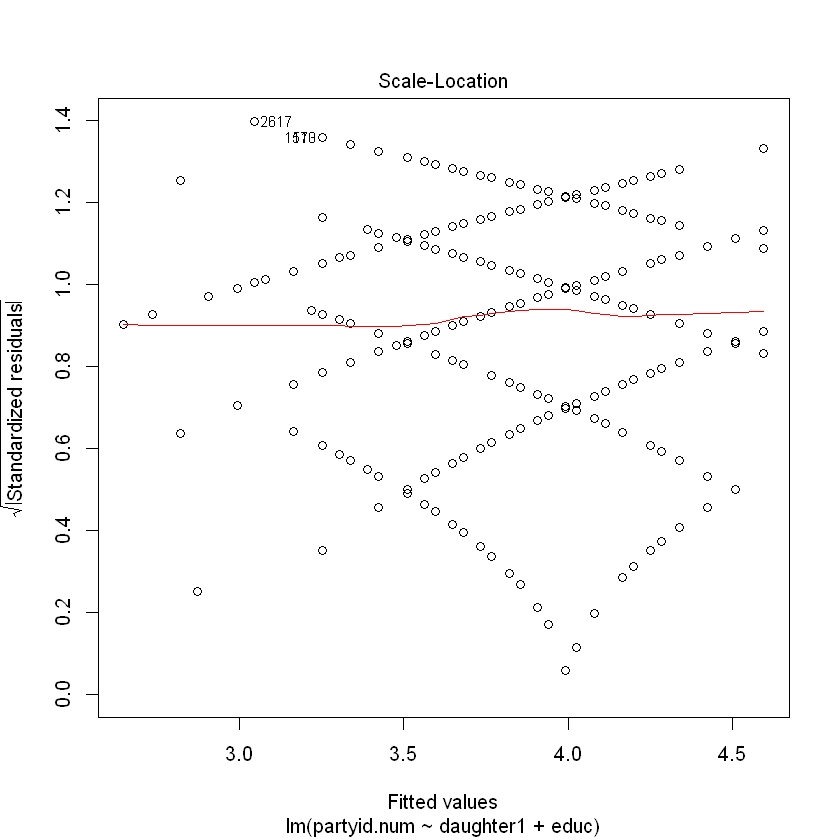

[1] 0.01552613

[1] 0.01462574

ERROR: Error in anova.lmlist(object, ...): models were not all fitted to the same size of dataset


[1] 4680.277

[1] 4656.889

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  model2
BP = 2.0821, df = 2, p-value = 0.3531



t test of coefficients:

            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) 2.562388   0.290029  8.8349 < 2.2e-16 ***
daughter1   0.311056   0.123797  2.5126   0.01213 *  
educ        0.086130   0.021573  3.9924  6.98e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


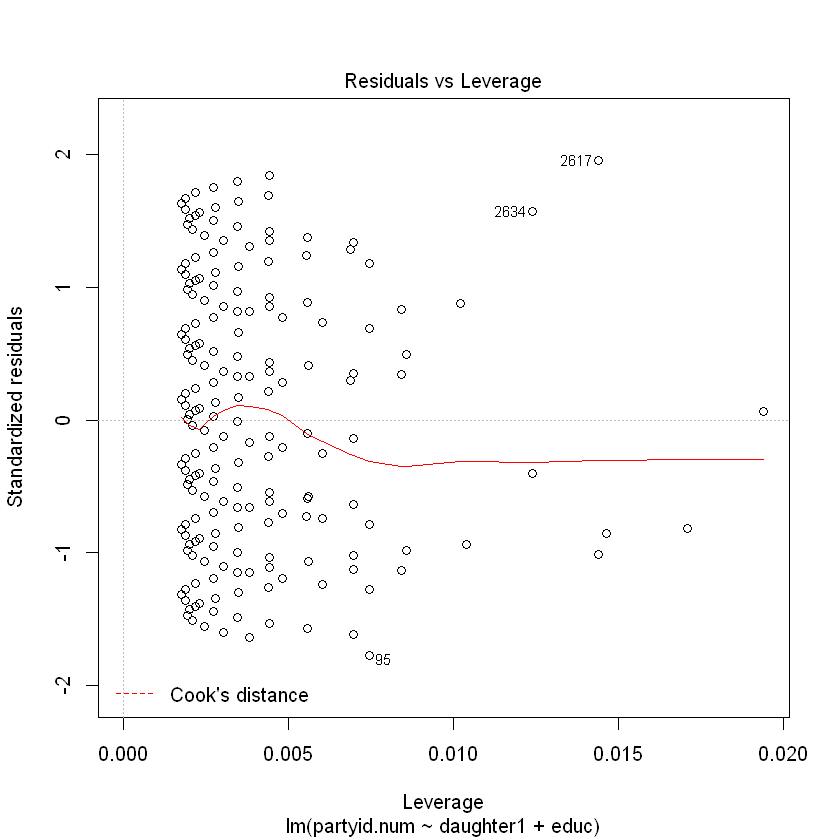

In [386]:
model2 <- update(party.by.daughter, .~. + educ)
sum2 <- summary(model2)
print(sum2)
plot(model2)

sum2$r.squared - sum1$r.squared
sum2$adj.r.squared - sum1$adj.r.squared

anova(model1, model2)

AIC(model1)
AIC(model2)

# install.packages("lmtest")
library(lmtest)
bptest(model2) # Breusch-pagan test for heteroskedasticity - null = homoskedastic

# install.packages("sandwich")  # if heteroskedastic, use sandwich method for robust standard errors
library(sandwich)
coeftest(model2, vcov=vcovHC)


iap    extremely liberal              liberal 
                   0                   25                  110 
    slightly liberal             moderate slghtly conservative 
                 125                  389                  178 
        conservative extrmly conservative                   dk 
                 220                   33                    0 
                  na                 NA's 
                   0                   43

ERROR: Error in `[<-.data.frame`(`*tmp*`, GSS$polviews.num < 1 | GSS$polviews.num > : missing values are not allowed in subscripted assignments of data frames



Call:
lm(formula = partyid.num ~ daughter1 + educ + polviews.num, data = GSS)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5494 -1.6632 -0.0511  1.5378  5.6429 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.07406    0.33301   0.222   0.8240    
daughter1     0.21783    0.11798   1.846   0.0651 .  
educ          0.09425    0.02085   4.520 6.87e-06 ***
polviews.num  0.57603    0.04274  13.477  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.922 on 1064 degrees of freedom
  (55 observations deleted due to missingness)
Multiple R-squared:  0.1656,	Adjusted R-squared:  0.1633 
F-statistic: 70.41 on 3 and 1064 DF,  p-value: < 2.2e-16


Warning message:
In smoother(.x, .y, col = col[2], log.x = logged("x"), log.y = logged("y"), : could not fit smooth

daughter1         educ polviews.num 
    1.003836     1.001238     1.003657

daughter1         educ polviews.num 
   0.9961782    0.9987633    0.9963567

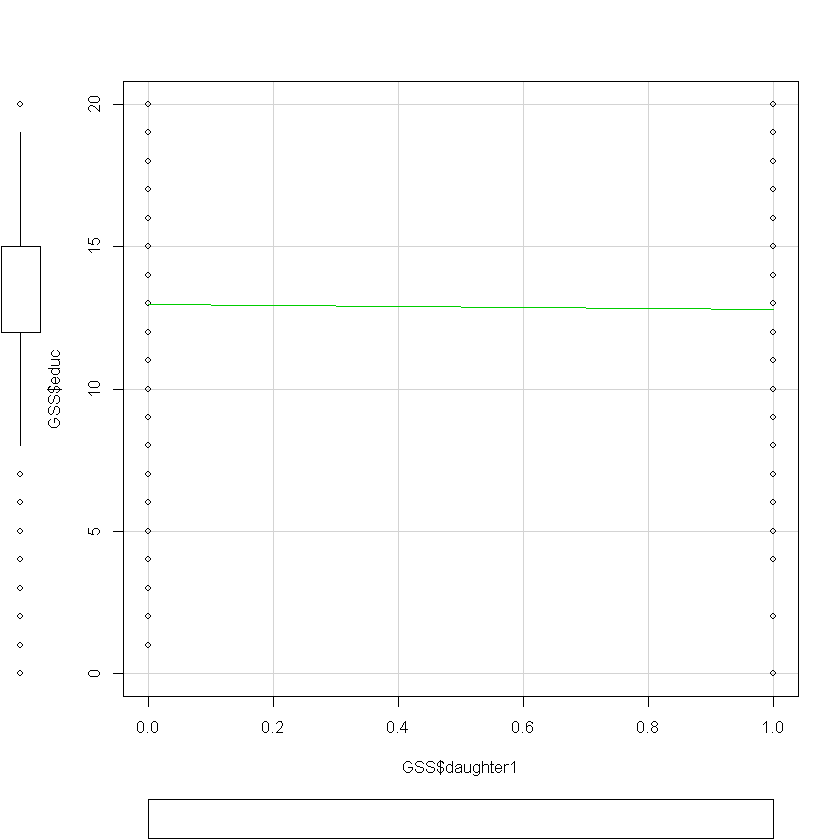

In [364]:
summary(GSS$polviews)
GSS$polviews.num <- as.numeric(GSS$polviews) - 1
GSS[GSS$polviews.num < 1 | GSS$polviews.num > 7, "polviews.num"] <- NA

model3 <- update(model2, .~. + polviews.num)
summary(model3)

scatterplot(GSS$daughter1, GSS$educ)

# no collinearity in the data... sqr root of vif > 2?
vif(model3)
1/vif(model3)


               y int          x1          x2           x3
1     0.90833964   1 -0.35948043  0.29899318  0.889833874
2     2.49761146   1  0.16248891  0.28879978  2.043184323
3     6.20279624   1  0.07150630 -0.90116228  0.117815849
4    -7.46577879   1  1.73093114  2.76797167  1.236328334
5    -1.88275872   1  0.29805988  0.95773482  1.684975588
6     7.38598550   1 -0.28934603 -0.58208387  2.646982453
7    -1.69583472   1 -0.09388270  0.74705734  0.609285054
8     0.77404929   1  2.49639112  1.11579619  0.403392407
9    -4.84337455   1 -2.27412634  0.41847547 -0.685496946
10   -5.20813536   1  1.33846166  1.75529416 -0.543411562
11   -7.09287093   1  0.32883499  1.72264648  0.145521762
12   -6.90848954   1  0.94040715  2.39088518  1.675191862
13   -8.59861731   1 -0.28684708  1.96332754  2.112227992
14    0.99779350   1  0.54876984  0.72291859  1.831386649
15  -11.39264359   1  1.72027724  2.89800027  0.446097358
16   -2.77940782   1  2.12941813  2.31613198  2.903530431
17    4.577463

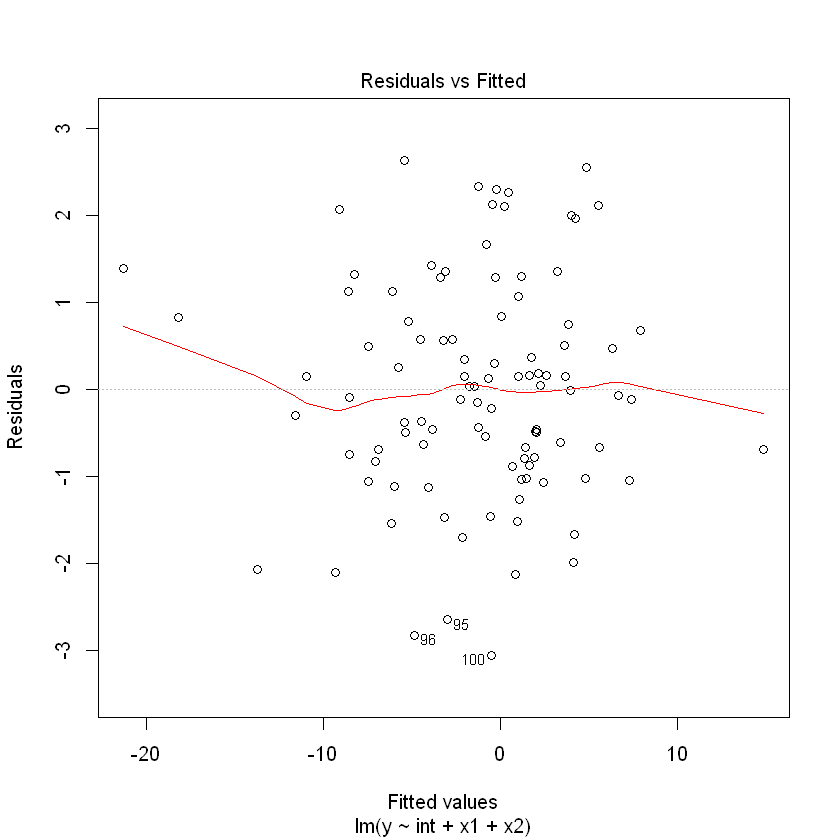

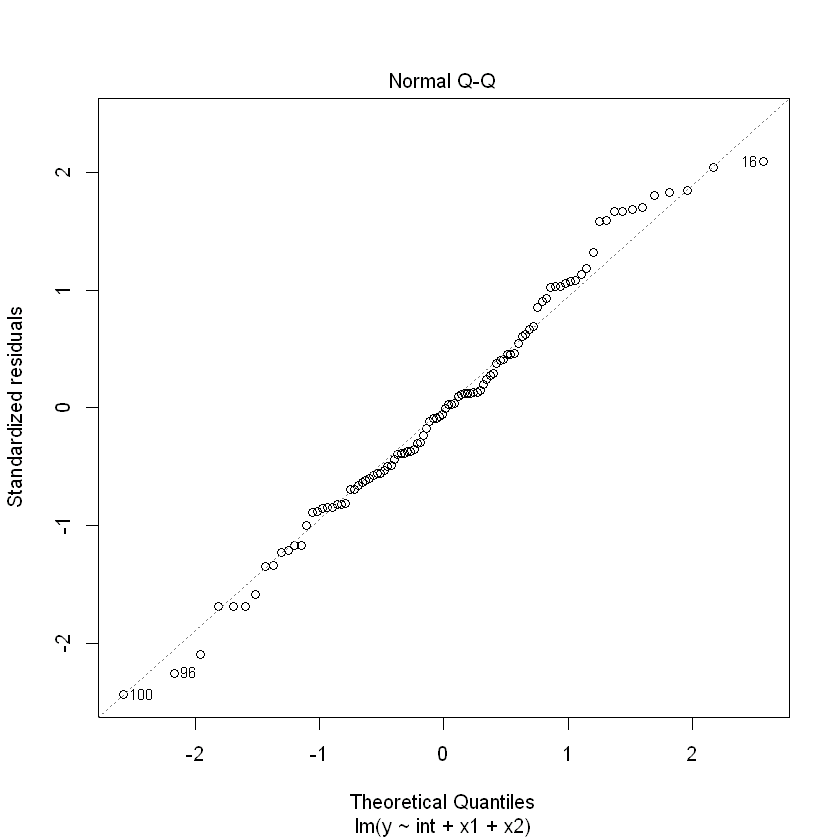

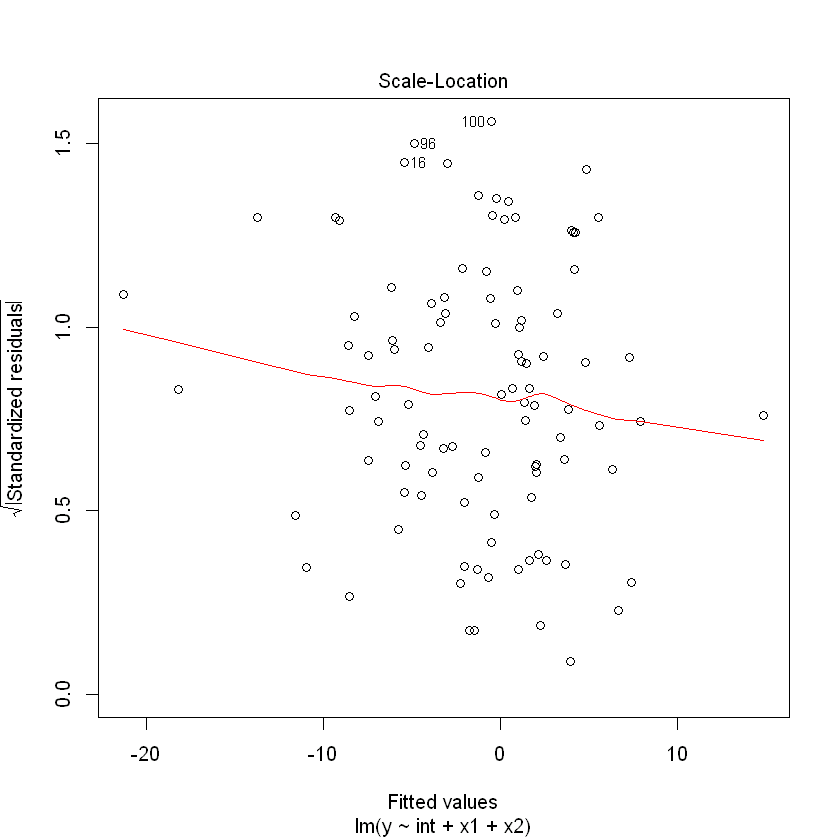


	studentized Breusch-Pagan test

data:  modeltest
BP = 0.3435, df = 3, p-value = 0.9516



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = sampledata, statistic = bootReg, R = 1000, formula = y ~ 
    int + x1 + x2)


Bootstrap Statistics :
     original        bias    std. error
t1*  2.376980  0.0079756882  0.17204796
t3*  2.050478  0.0001488536  0.07945119
t4* -5.244887 -0.0108234155  0.12100229


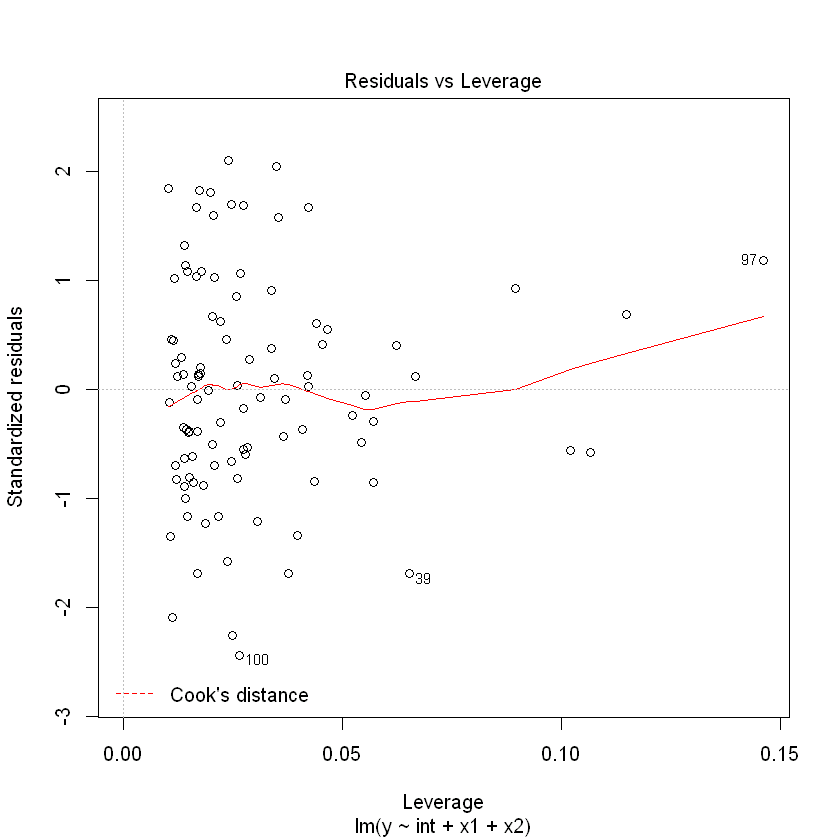

In [66]:
library(MASS)
N = 100
# creating independent variables
# first, the covariance matrix for our multi-variate normal
# this determines the correlation of our independent variables.
sig = matrix(c(2,0.5,0.25,0.5,1,0,0.25,0,1), nrow=3)

#Q: sig is bit of a mystery to me.  How is it affecting M?

# now the variables
M = mvrnorm(n=N, mu=rep(1,3), Sigma=sig)

y.cont = 1 + 2*M[,1] - 5*M[,2] + M[,3] + rnorm(N)
y.bin = as.numeric(y.cont>0)

# include the intercept in your independent variables
X = cbind(1,M)
y = y.cont # continuous
# or y = y.bin, depending on the exercise  # binary data

sampledata = cbind(y, X)
colnames(sampledata) <- c("y", "int", "x1", "x2", "x3")

sampledata = data.frame(sampledata)

print(sampledata)


# Part 1. Generate data for a simple linear model but in a way that violates homoskedasticity
library(lmtest)
library(car)

library(boot)
library(sandwich)

modeltest <- lm(y ~ int+x1+x2, data=sampledata)
plot(modeltest)

# We have a bunch of y's that are calculated 
# from 3 x's, an intercept, and some random noise, but how to make 
# it heteroskedastic?  I'd expect an "sd" parameter that I can increase,
# but I don't really get the mvrnorm function.  It looks like the covariance
# matrix controls the spread, so maybe increase those values for later rows?

bptest(modeltest)

bootReg<-function(formula, data, i)
    {  
    d <- data[i,]  # there was a bug in the book
    fit <- lm(formula, data = d)  
    return(coef(fit))
    }

# goal: write a function that 
# (1) samples from my data (boot does this)
# (2) run a function on sampled data  --> produce a statistic  (I need to do this)
# (3) look at the "static"s --> cofints out of them (boot does this)

booty = boot(statistic = bootReg, formula = y ~ int+x1+x2, data=sampledata, R=1000) 
# indices are generated by boot?  formula is passed through to the custom function?
# Totally confused by this; I'm going to save my energy for the final.

print(booty)




[1] 1 1 1


In [8]:
# create the data first for tailiness=.333:
y = rbinom(n=100,p=.333,size=1)
LLy = function(b, y)
return( sum( log(ifelse(y==1, b, 1-b) ) ) )
b0 = 0.5 #starting value
# we are doing maximization with optim this time
# so use fnscale=-1
#ignore the warning that tells you the default method is
# not the best method for the problem at hand.
# If there is convergence, optim’s output $par should be
# close to 0.333
result =optim(b0, fn = LLy, y=y, control = list( fnscale = -1 ) )


Warning message:
In optim(b0, fn = LLy, y = y, control = list(fnscale = -1)): one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly

In [50]:
x1 = rnorm(N <- 100)
x2 = x1/10 + rnorm(N)
e = rnorm(N) * 10
y = 5 - 3 * x1 + 2*x2 + e
m <- lm(y~x1+x2)
summary(m)

confint(m)

coef(summary(m))
cf = coef(summary(m))[,1]
se = coef(summary(m))[,2]
cf
se
summary(m)

thresh = qt(0.25, df=97)
thresh
cbind(thresh * se + cf, -thresh*se+cf)
confint(m)



Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3977  -4.9700  -0.3835   5.2847  29.5026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7966     0.9485   6.111 2.06e-08 ***
x1           -0.6513     1.0188  -0.639    0.524    
x2            1.9454     1.1806   1.648    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.472 on 97 degrees of freedom
Multiple R-squared:  0.02869,	Adjusted R-squared:  0.008668 
F-statistic: 1.433 on 2 and 97 DF,  p-value: 0.2436


2.5 %   97.5 %
(Intercept)  3.9140952 7.679018
x1          -2.6732952 1.370657
x2          -0.3977269 4.288509

Estimate Std. Error    t value     Pr(>|t|)
(Intercept)  5.7965566  0.9484755  6.1114456 2.058767e-08
x1          -0.6513193  1.0187697 -0.6393194 5.241221e-01
x2           1.9453910  1.1805767  1.6478311 1.026230e-01

(Intercept)          x1          x2 
  5.7965566  -0.6513193   1.9453910

(Intercept)          x1          x2 
  0.9484755   1.0187697   1.1805767


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3977  -4.9700  -0.3835   5.2847  29.5026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.7966     0.9485   6.111 2.06e-08 ***
x1           -0.6513     1.0188  -0.639    0.524    
x2            1.9454     1.1806   1.648    0.103    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.472 on 97 degrees of freedom
Multiple R-squared:  0.02869,	Adjusted R-squared:  0.008668 
F-statistic: 1.433 on 2 and 97 DF,  p-value: 0.2436


[1] -0.6770274

[,1]       [,2]
(Intercept)  5.154413 6.43870055
x1          -1.341054 0.03841575
x2           1.146108 2.74467376

2.5 %   97.5 %
(Intercept)  3.9140952 7.679018
x1          -2.6732952 1.370657
x2          -0.3977269 4.288509

You will run a logistic regression to predict the probability of survival (survived).  Begin with one predictor variable, parch, representing the number of parents and children that each individual had on the boat.

Create a plot of the actual survival percentages by parch. Comment on whether the logistic model seems appropriate---hint: is it something that has a logistic shape (flattened-s shaped) or can be part of that shape, or not?

Run the logistic model and comment on both the statistical and practical significance of your predictor. Add other independent variables that you think make sense.

Use "predict" to predict probabilities for changes in one of your independent variables. 

for example, if you have estimated "model1," you can predict probabilities out of your model by doing this:

mydata  = data.frame( parch = 0:10 )
mydata$predicted.probability = predict( model1, newdata = mydata, type='response' )


Continue exploring the dataset and find something interesting to share with the class! You may want to include parch^2 as well. Remember that you need to use I(parch^2) on the right hand side to prevent glm from trying to interpret your parch^2  in some other way. 


- Use the anova command to compare the two models.
- Plot predicted probabilities against the actual observation of survival rate.


 pclass       survived                                  name          sex     
 1st:323   Min.   :0.000   Connolly, Miss. Kate           :   2   female:466  
 2nd:277   1st Qu.:0.000   Kelly, Mr. James               :   2   male  :843  
 3rd:709   Median :0.000   Abbing, Mr. Anthony            :   1               
           Mean   :0.382   Abbott, Master. Eugene Joseph  :   1               
           3rd Qu.:1.000   Abbott, Mr. Rossmore Edward    :   1               
           Max.   :1.000   Abbott, Mrs. Stanton (Rosa Hunt:   1               
                           (Other)                        :1301               
      age              sibsp            parch            ticket    
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.000   CA. 2343:  11  
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000   1601    :   8  
 Median :28.0000   Median :0.0000   Median :0.000   CA 2144 :   8  
 Mean   :29.8811   Mean   :0.4989   Mean   :0.385   3101295 :   7  
 3rd Qu.:39.0000   3rd Qu.:1

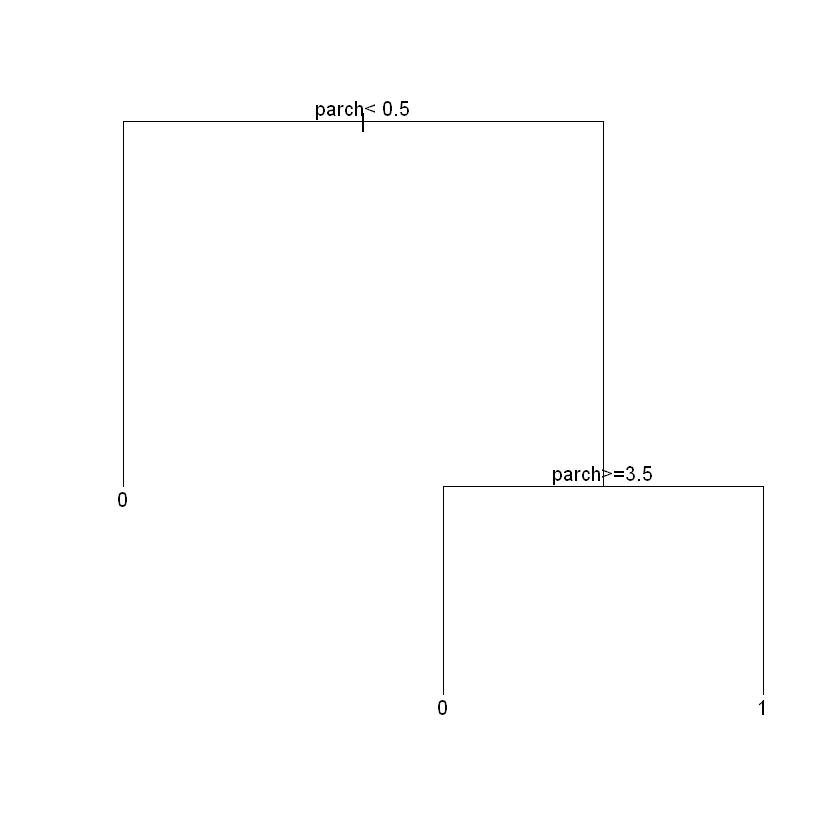

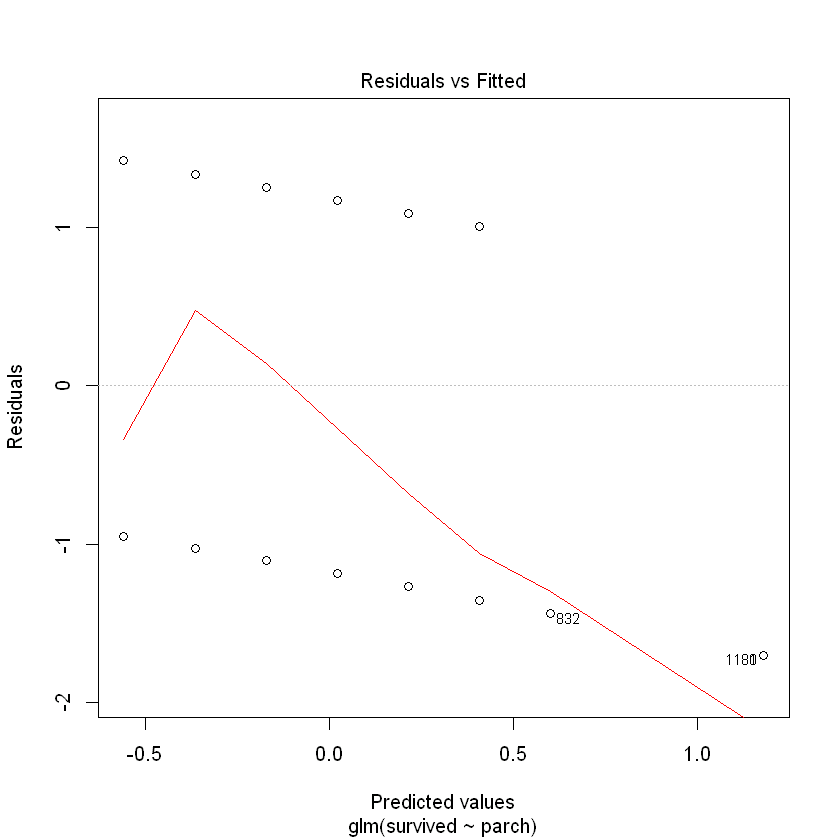

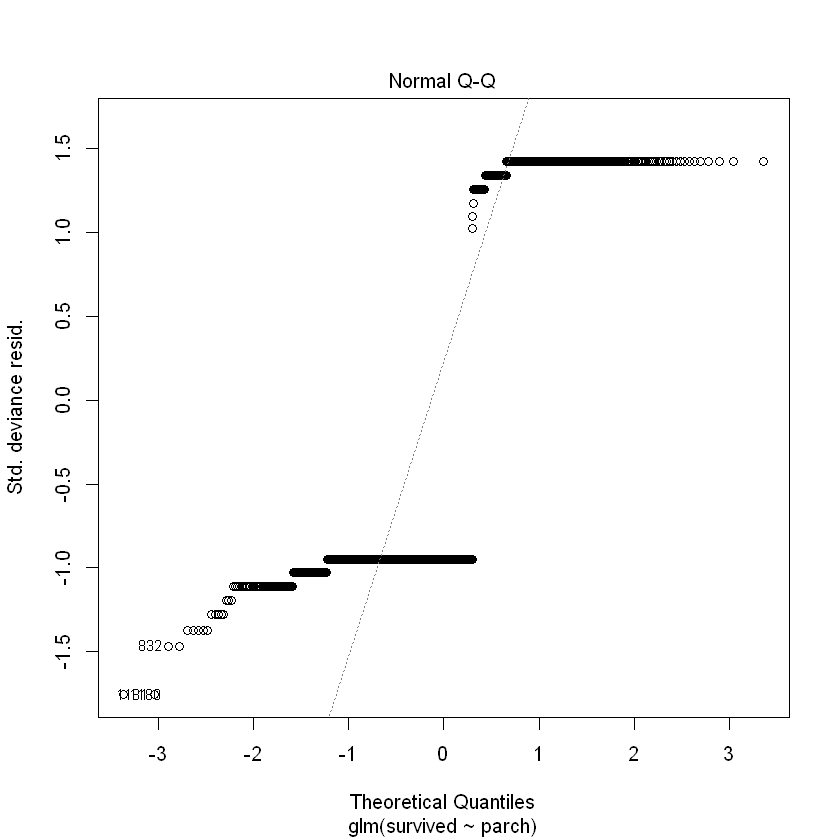

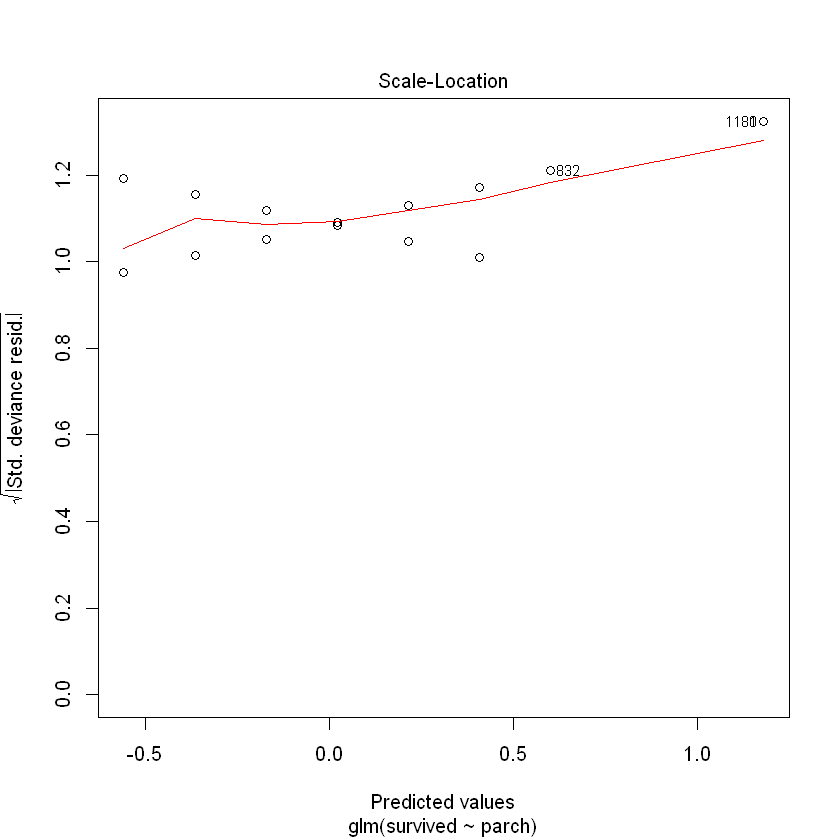


Call:
glm(formula = survived ~ parch, family = binomial, data = titanic3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7022  -0.9516  -0.9516   1.4215   1.4215  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.55753    0.06289  -8.865  < 2e-16 ***
parch        0.19318    0.06625   2.916  0.00355 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1741.0  on 1308  degrees of freedom
Residual deviance: 1732.3  on 1307  degrees of freedom
AIC: 1736.3

Number of Fisher Scoring iterations: 4


[1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"

Source: local data frame [8 x 3]

  parch survival.rate count
1     0     0.3353293  1002
2     1     0.5882353   170
3     2     0.5044248   113
4     3     0.6250000     8
5     4     0.1666667     6
6     5     0.1666667     6
7     6     0.0000000     2
8     9     0.0000000     2

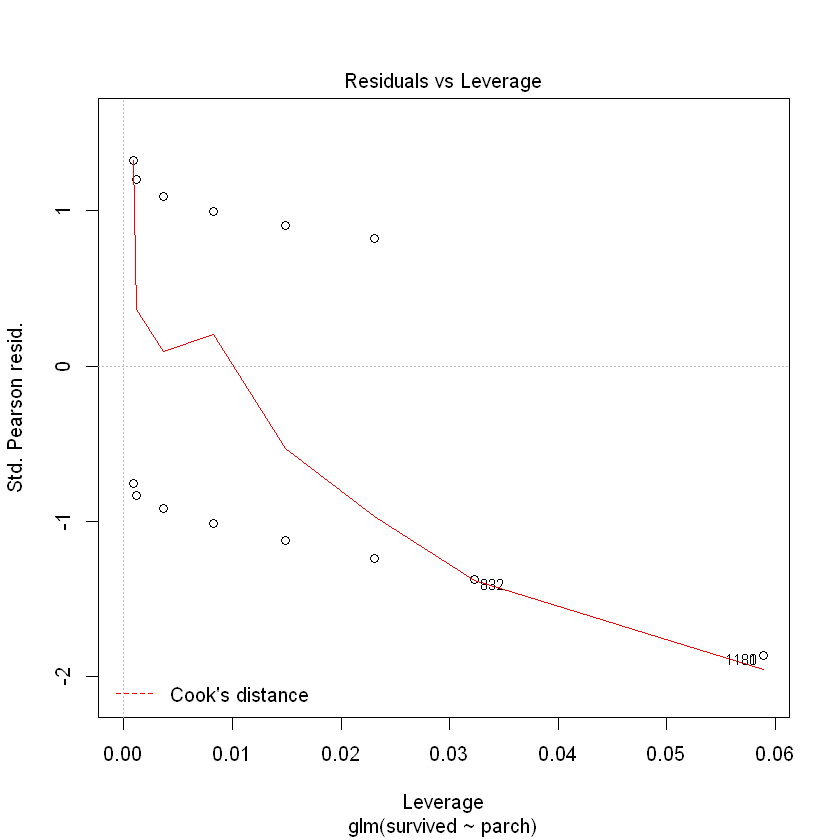


Call:
glm(formula = survived ~ parch, family = binomial, data = DT)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7022  -0.9516  -0.9516   1.4215   1.4215  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.55753    0.06289  -8.865  < 2e-16 ***
parch        0.19318    0.06625   2.916  0.00355 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1741.0  on 1308  degrees of freedom
Residual deviance: 1732.3  on 1307  degrees of freedom
AIC: 1736.3

Number of Fisher Scoring iterations: 4



Call:
glm(formula = survived ~ parch + I(parch^2), family = binomial, 
    data = DT)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3041  -0.9102  -0.9102   1.4705   2.3967  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.66698    0.06625 -10.068  < 2e-16 ***
parch        1.08623    0.18222   5.961 2.50e-09 ***
I(parch^2)  -0.30312    0.07169  -4.228 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1741.0  on 1308  degrees of freedom
Residual deviance: 1693.3  on 1306  degrees of freedom
AIC: 1699.3

Number of Fisher Scoring iterations: 6


Analysis of Deviance Table

Model 1: survived ~ parch
Model 2: survived ~ parch + I(parch^2)
  Resid. Df Resid. Dev Df Deviance
1      1307     1732.3            
2      1306     1693.3  1   39.001

[1] 1736.264

[1] 1699.263

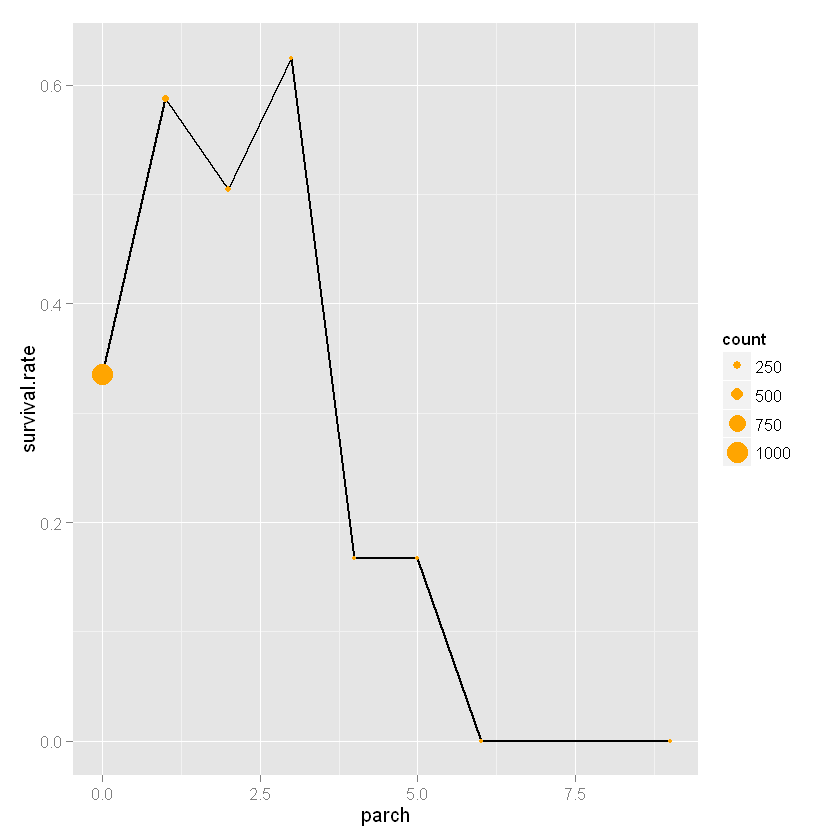

In [14]:

library(PASWR)

summary(titanic3)

# plot survival % by parch
library(rpart)
fit <- rpart(survived ~ parch, data=titanic3, method="class")
plot(fit)
text(fit)

fit2 <- glm(survived ~ parch, data=titanic3, family=binomial)
plot(fit2)
summary(fit2)


#Ali's code
library(PASWR)
library(dplyr)
library(tidyr)
library(ggplot2)

DT = titanic3
names(DT)

SR = DT %>% group_by(parch) %>% 
  summarize(survival.rate = mean(survived,na.rm=TRUE) , count = n() )

SR

ggplot(SR , aes(parch,survival.rate,size=count))  + 
  geom_line(size=.7) + 
  geom_point(color='orange') 


model1 = glm(survived ~ parch , data = DT , family = binomial)
model2 = glm(survived ~ parch + I(parch^2) , data = DT , family = binomial)

SR$pred.1 = predict(model1, newdata = SR , type = 'response') 
SR$pred.2 = predict(model2, newdata = SR , type = 'response') 

summary(model1)
summary(model2)

anova(model1, model2)

AIC(model1)
AIC(model2)


In [20]:

summary(SR)

anova(model1, model2, test="Chisq")

AIC(model1)
AIC(model2)

     parch      survival.rate        count            pred.1      
 Min.   :0.00   Min.   :0.0000   Min.   :   2.0   Min.   :0.3641  
 1st Qu.:1.75   1st Qu.:0.1250   1st Qu.:   5.0   1st Qu.:0.4455  
 Median :3.50   Median :0.2510   Median :   7.0   Median :0.5295  
 Mean   :3.75   Mean   :0.2983   Mean   : 163.6   Mean   :0.5378  
 3rd Qu.:5.25   3rd Qu.:0.5254   3rd Qu.: 127.2   3rd Qu.:0.6120  
 Max.   :9.00   Max.   :0.6250   Max.   :1002.0   Max.   :0.7651  
     pred.2         
 Min.   :0.0000002  
 1st Qu.:0.0440119  
 Median :0.2878389  
 Mean   :0.2757819  
 3rd Qu.:0.4817241  
 Max.   :0.5727326  

Analysis of Deviance Table

Model 1: survived ~ parch
Model 2: survived ~ parch + I(parch^2)
  Resid. Df Resid. Dev Df Deviance  Pr(>Chi)    
1      1307     1732.3                          
2      1306     1693.3  1   39.001 4.237e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 1736.264

[1] 1699.263

In [ ]:
#Adam's code
## Week 14 class exercise

## Logistic regression

## load libraries
library(PASWR)
library(dplyr)
library(ggplot2)


## You will run a logistic regression to predict the probability of
## survival (survived). Begin with one predictor variable, parch,
## representing the number of parents and children that each
## individual had on the boat.
mod <- glm(data=titanic3,survived~parch,family=binomial(link=logit))


## Create a plot of the actual survival percentages by parch. Comment on whether the logistic model seems appropriate---hint: is it something that has a logistic shape (flattened-s shaped) or can be part of that shape, or not?
surv_table <- titanic3 %>% group_by(parch) %>%
summarise(count=n(),
mean_surv=mean(survived),
p=mean_surv,
lower=p-1.96*sqrt(p*(1-p)/n()),
upper=p+1.96*sqrt(p*(1-p)/n()))

## confidence intervals bounded by [0,1]
surv_table <- surv_table %>% mutate(lower=ifelse(lower<0,0,lower),
upper=ifelse(upper>1,1,upper))
## define plot
gp <- ggplot(data=surv_table,aes(x=parch,y=mean_surv))
## plot
gp2 <- gp+geom_errorbar(data=surv_table,aes(ymax=upper,ymin=lower),width=0.25)+geom_point(aes(size=count),color="red")+geom_line(color="red")+theme_bw()
## nicer x-axis
gp2+scale_x_continuous(breaks=min(titanic3$parch):max(titanic3$parch))

## Run the logistic model and comment on both the statistical and
## practical significance of your predictor. Add other independent
## variables that you think make sense. (now just the second order
## term as during class)
summary(mod)
## unit increase in parch increases survival 21.3%
exp(coef(mod))
## add second degree term
mod2 <- glm(data=titanic3,survived~parch+I(parch^(2)),
family=binomial)
## unit increase in parch changes the odds of survival
get_survival_change <- function(from,to,quadratic_model) {
coef <- exp(coef(quadratic_model))
linear <- coef[2]^(to-from)
quadratic <- coef[3]^(to^(2)-from^(2))
change <- linear*quadratic
return(change)
}
coefs <- exp(coef(mod2))
get_survival_change(from=0,to=1,quadratic_model=mod2)
get_survival_change(from=3,to=4,quadratic_model=mod2)


## Use "predict" to predict probabilities for changes in one
## of your independent variables.
## for example, if you have estimated "model1," you can predict
## probabilities out of your model by doing this:

titanic3$linear_prediction <- predict(mod,type="response")
titanic3$quadratic_prediction <- predict(mod2,type="response")

predicted_means <- titanic3 %>% group_by(parch) %>%
summarise(pred_quadratic=
mean(quadratic_prediction),
pred_linear=mean(linear_prediction))

## add predictions to the plot
gp2+geom_line(data=predicted_means,aes(y=pred_quadratic),
color="blue",linetype=2)+
geom_line(data=predicted_means,aes(y=pred_linear),
color="black",linetype=2)

## - Use the anova command to compare the two models.
anova(mod,mod2,test="Chisq")

## check if the survival change function works
titanic3$quadratic_prediction_logit<- predict(mod2,type="link")
## get prediction
predicted_means_logit<- titanic3 %>% group_by(parch) %>%
summarise(pred_quadratic_logit=mean(quadratic_prediction_logit))
## ok
exp(predicted_means[7,2])/exp(predicted_means[4,2])
get_survival_change(from=3,to=6,quadratic_model=mod2)



In [99]:
# Final, aaah!!!
setwd("C:/Users/Jay/MIDSR")
df = read.csv("Dating.csv", header=TRUE)
library(lmtest)

# summary(df)

# 15.1 - recode life_quality to reverse the scale
cat("15.1 - life quality", "\n")
table(df$life_quality)
df$life_quality_rev = 6 - as.numeric(as.character(df$life_quality))
table(df$life_quality, df$life_quality_rev)

head(df)

table(df$life_quality_rev)
summary(df$life_quality_rev)
cat("The mean of the recoded life_quality field is:", mean(df$life_quality_rev, na.rm = TRUE), "\n")

#Looks good!  Let's overwrite the original
df$life_quality = df$life_quality_rev

# 15.2 - find the mean of years_in_relationship
df$years_in_relationship_num = as.numeric(as.character(df$years_in_relationship))
cat("15.2 - years in relationship", "\n")

summary(df$years_in_relationship)
summary(df$years_in_relationship_num)
#Look's good, let's overwrite again
df$years_in_relationship = df$years_in_relationship_num

cat("The mean of the recoded years_in_relationship field is:", mean(df$years_in_relationship, na.rm = TRUE))

#15.3 - how many complete cases for life_quality, years_in_relationship, and use_internet?
# cat("Before cleaning use_internet", "\n")
# summary(df)

df = df[df$use_internet=='Yes'|df$use_internet=='No',]

# cat("After cleaning use_internet", "\n")
# summary(df)

# data[complete.cases(data$Shoulders), ] 
cleandf = df[complete.cases(df$years_in_relationship, df$life_quality), ]
# cat("After cleaning years_in_relationship and life_quality", "\n")
# summary(cleandf)
cat("Number of complete cases: ", nrow(cleandf))

#15.4 and 15.5 - nested regression time!
library(QuantPsyc)

model1 <- lm(life_quality~years_in_relationship, data=cleandf)
summary(model1)
cat("Standardized betas", "\n")
lm.beta(model1)

model2 <- lm(life_quality~years_in_relationship+use_internet, data=cleandf)
summary(model2)
cat("Standardized betas", "\n")
lm.beta(model2)

#15.6 - improvement from model1 to model2?
# anova(model1,model2,test="Chisq")
anova(model1,model2)
waldtest(model1, model2)

AIC(model1)
AIC(model2)

#16.1 - odds that a respondent has flirted at some point

# start from scratch 
df = read.csv("Dating.csv", header=TRUE)

# cat("Before cleaning flirted_online", "\n")
# summary(df)

df = df[df$flirted_online=='Yes'|df$flirted_online=='No',]

# cat("After cleaning flirted_online", "\n")
# summary(df)

flirted = nrow(df[df$flirted_online=='Yes',])
notflirted = nrow(df[df$flirted_online=='No',])

cat("Odds respondent flirted: ", flirted / notflirted)

#16.2 - logistic regression and AIC
df$flirted = as.integer(df$flirted_online=='Yes')
table(df$flirted, df$flirted_online)

df = df[df$usr=='Rural'|df$usr=='Suburban'|df$usr=='Urban',]
# cat("After cleaning usr", "\n")
# summary(df)

logmodel1 <- glm(data=df,flirted~usr,family=binomial(link=logit))
summary(logmodel1)

cat("Urban vs. rural coefficient: ", coef(logmodel1)[3], "\n")
cat("Odds ratio when Urban goes from 0 to 1: ", exp(coef(logmodel1)[3]))


15.1 - life quality 



         1          2          3          4          5 Don't know    Refused 
       407        618        762        335        110          8         12 

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

            
               1   2   3   4   5
  1            0   0   0   0 407
  2            0   0   0 618   0
  3            0   0 762   0   0
  4            0 335   0   0   0
  5          110   0   0   0   0
  Don't know   0   0   0   0   0
  Refused      0   0   0   0   0

state    region      usr    sex life_quality use_internet use_email
1     5     South    Rural Female            2          Yes       Yes
2    17   Midwest Suburban Female            2          Yes       Yes
3    34 Northeast Suburban   Male            3                       
4    26   Midwest Suburban   Male            5                       
5    45     South    Urban Female            3                       
6    19   Midwest    Rural Female            4          Yes        No
  use_social_networking use_twitter use_reddit googled_own_name have_cell_phone
1                    No          No         No               No             Yes
2                   Yes          No         No              Yes             Yes
3                    No          No         No              Yes             Yes
4                                                                           Yes
5                   Yes          No         No              Yes             Yes
6                   Yes          No         No               No             Yes
  have_tablet have_smart_phone marital_status in_relationship
1         Yes               No        Married             Yes
2          No              Yes        Married             Yes
3          No              Yes        Married             Yes
4          No               No        Widowed              No
5          No               No        Married             Yes
6          No               No        Married             Yes
  years_in_relationship looking_for_partner met_partner_online
1                    57                                     No
2                    15                                     No
3                    15                                     No
4                     0                  No                   
5                    18                                     No
6                    23                                     No
  searched_for_ex_online flirted_online used_dating_site age have_children
1                     No             No               No  77            No
2                     No             No               No  38           Yes
3                    Yes             No               No  51           Yes
4                                                         88            No
5                     No             No               No  62            No
6                     No             No               No  48           Yes
  children0_5 children6_11 children12_17 adults_in_household educ2 emplnw
1          NA           NA            NA                   2     8      3
2           0            1             1                   2     6      2
3           1            2             0                   2     4      1
4          NA           NA            NA                   1     4      3
5          NA           NA            NA                   2     6      3
6           0            0             3                   2     5      1
        race income     lgbt   weight   standwt life_quality_rev
1      White      5 Straight 1.258065 0.3972681                4
2      White      9 Straight 2.354839 0.7436044                4
3 Mixed race      8 Straight 6.870968 2.1696951                3
4      White      2  Refused 1.419355 0.4481999                1
5      White     99 Straight 1.419355 0.4481999                3
6      White      3 Straight 2.419355 0.7639772                2


  1   2   3   4   5 
110 335 762 618 407 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   3.000   3.000   3.393   4.000   5.000      20 

The mean of the recoded life_quality field is: 3.392921 


Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

15.2 - years in relationship 


0       1      10      11      12      13      14      15      16 
     43     832      91      45      14      41      24      29      43      15 
     17      18      19       2      20      21      22      23      24      25 
     18      28       9      66      54      15      15      27      24      43 
     26      27      28      29       3      30      31      32      33      34 
     18      15      13      11      52      39      11      20      10      10 
     35      36      37      38      39       4      40      41      42      43 
     31      12      19      16       6      35      30       7       9      21 
     44      45      46      47      48      49       5      50      51      52 
     12      20      18      15      10       7      56      22       2      12 
     53      54      55      56      57      58      59       6      60      61 
      6       4       8      10      11       3       3      37       6       2 
     62      63      65      66      67       7       8      86       9      97 
      6       6       4       1       1      34      31       1      26       1 
Refused 
     16

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    0.00    5.00   13.48   24.00   97.00      59 

The mean of the recoded years_in_relationship field is: 13.47697Number of complete cases:  1090


Call:
lm(formula = life_quality ~ years_in_relationship, data = cleandf)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6296 -0.4799 -0.3302  0.6698  1.6698 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.33022    0.04170  79.853   <2e-16 ***
years_in_relationship  0.00499    0.00197   2.533   0.0115 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.093 on 1088 degrees of freedom
Multiple R-squared:  0.005861,	Adjusted R-squared:  0.004947 
F-statistic: 6.414 on 1 and 1088 DF,  p-value: 0.01146


Standardized betas 


years_in_relationship 
           0.07655665


Call:
lm(formula = life_quality ~ years_in_relationship + use_internet, 
    data = cleandf)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.61852 -0.53523 -0.01881  0.60195  2.00568 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.994316   0.084309  35.516  < 2e-16 ***
years_in_relationship 0.004899   0.001952   2.509   0.0122 *  
use_internetYes       0.403738   0.088325   4.571 5.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.083 on 1087 degrees of freedom
Multiple R-squared:  0.02461,	Adjusted R-squared:  0.02282 
F-statistic: 13.71 on 2 and 1087 DF,  p-value: 1.314e-06


Standardized betas 


years_in_relationship       use_internetYes 
           0.07516958            0.13693379

Analysis of Variance Table

Model 1: life_quality ~ years_in_relationship
Model 2: life_quality ~ years_in_relationship + use_internet
  Res.Df    RSS Df Sum of Sq      F   Pr(>F)    
1   1088 1298.7                                 
2   1087 1274.2  1    24.493 20.894 5.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Wald test

Model 1: life_quality ~ years_in_relationship
Model 2: life_quality ~ years_in_relationship + use_internet
  Res.Df Df      F   Pr(>F)    
1   1088                       
2   1087  1 20.894 5.41e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

[1] 3290.248

[1] 3271.494

Odds respondent flirted:  0.2613636

   
         Don't know   No Refused  Yes
  0    0          0 1496       0    0
  1    0          0    0       0  391


Call:
glm(formula = flirted ~ usr, family = binomial(link = logit), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7592  -0.7592  -0.6731  -0.5432   1.9934  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.8392     0.1554 -11.837  < 2e-16 ***
usrSuburban   0.4697     0.1764   2.663  0.00774 ** 
usrUrban      0.7427     0.1799   4.127 3.67e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1922.0  on 1884  degrees of freedom
Residual deviance: 1903.4  on 1882  degrees of freedom
AIC: 1909.4

Number of Fisher Scoring iterations: 4


Urban vs. rural coefficient:  0.7426735 
Odds ratio when Urban goes from 0 to 1:  2.101546

In [109]:
setwd("C:/Users/Jay/MIDSR")
df = read.csv("Dating.csv", header=TRUE)

summary(df)
print(mean(df$life_quality))
df = df[df$life_quality!="Don't know"&df$life_quality!="Refused",]

summary(df)
print(mean(df$life_quality))



     state            region          usr           sex           life_quality
 Min.   : 1.0   Midwest  :519           :   2   Female:1223   1         :407  
 1st Qu.:13.0   Northeast:376   Rural   : 450   Male  :1029   2         :618  
 Median :29.0   South    :870   Suburban:1037                 3         :762  
 Mean   :28.6   West     :487   Urban   : 763                 4         :335  
 3rd Qu.:42.0                                                 5         :110  
 Max.   :56.0                                                 Don't know:  8  
                                                              Refused   : 12  
     use_internet  use_email  use_social_networking     use_twitter  
           :1122      :1122          : 357                    : 357  
 Don't know:   2   No : 262   No     : 586          Don't know:   1  
 No        : 190   Yes: 868   Refused:   3          No        :1586  
 Refused   :   2              Yes    :1306          Refused   :   1  
 Yes       : 936  

Warning message:
In mean.default(df$life_quality): argument is not numeric or logical: returning NA

[1] NA


     state             region          usr           sex           life_quality
 Min.   : 1.00   Midwest  :514           :   2   Female:1212   1         :407  
 1st Qu.:13.00   Northeast:370   Rural   : 443   Male  :1020   2         :618  
 Median :29.00   South    :863   Suburban:1027                 3         :762  
 Mean   :28.56   West     :485   Urban   : 760                 4         :335  
 3rd Qu.:42.00                                                 5         :110  
 Max.   :56.00                                                 Don't know:  0  
                                                               Refused   :  0  
     use_internet  use_email  use_social_networking     use_twitter  
           :1111      :1111          : 347                    : 347  
 Don't know:   1   No : 257   No     : 583          Don't know:   1  
 No        : 186   Yes: 864   Refused:   3          No        :1577  
 Refused   :   2              Yes    :1299          Refused   :   1  
 Yes      

Warning message:
In mean.default(df$life_quality): argument is not numeric or logical: returning NA

[1] NA
